# Telco Customer Churn

# Business Understanding:

Perusahaan Telco adalah penyedia layanan telekomunikasi berbasis langganan yang menghadapi tantangan dalam mempertahankan pelanggan karena meningkatnya jumlah pelanggan yang berhenti menggunakan layanan (churn). Untuk menjaga pertumbuhan dan stabilitas pendapatan, perusahaan dapat memilih antara menarik pelanggan baru atau mempertahankan yang sudah ada—di mana mempertahankan pelanggan terbukti lebih hemat biaya. Untuk itu, proyek ini memanfaatkan pendekatan klasifikasi menggunakan Machine Learning, yang memungkinkan perusahaan memprediksi apakah seorang pelanggan berpotensi churn atau tidak berdasarkan data historis seperti lama berlangganan, jenis kontrak, dan layanan yang digunakan. Dengan prediksi ini, perusahaan dapat mengambil tindakan yang lebih proaktif dan efisien dalam menjaga loyalitas pelanggan.

# Problem Statement:

- Bagaimana memprediksi pelanggan yang berisiko berhenti berlangganan (churn) pada perusahaan telekomunikasi?

- Model klasifikasi apa yang paling efektif untuk memprediksi churn pelanggan?

- Faktor-faktor apa saja yang paling berpengaruh terhadap keputusan pelanggan untuk berhenti berlangganan?

# Goals:

Tujuan dari proyek ini adalah untuk membantu perusahaan telekomunikasi mengidentifikasi pelanggan yang kemungkinan besar akan berhenti berlangganan (churn) dengan menggunakan model klasifikasi berbasis Machine Learning. Dengan memanfaatkan data pelanggan yang sudah ada, seperti lama berlangganan, jenis layanan, dan pola penggunaan, model ini diharapkan dapat memberikan prediksi yang akurat. Hasil prediksi ini akan membantu perusahaan mengambil langkah lebih cepat dan tepat untuk mempertahankan pelanggan, mengurangi tingkat churn, dan menjaga kestabilan pendapatan

# Analytic Approach:

1. **Data Understanding**:
   - Dataset: Telco Customer Churn, 4.930 baris, 11 fitur (numerik dan kategorikal).
   - Target: Kolom Churn (Yes/No).
   - Langkah ini penting untuk memahami struktur data dan target, jadi tidak ada kelebihan di sini. **Sesuai**.

2. **Data Preprocessing**:
   - Tidak ada missing value → bagus, langkah pengecekan penting.
   - Tidak dijelaskan bagaimana mendeteksi outlier → seharusnya ada metode spesifik (misalnya IQR atau Z-score). Ini sedikit kurang detail.
   - Menghapus 77 duplikat → langkah standar untuk memastikan data bersih.
   - Mengatasi bias → tidak dijelaskan caranya, tapi ini krusial karena churn biasanya imbalance (Yes jauh lebih sedikit dari No). Langkah ini perlu, tapi kurang spesifikasi. **Agak kurang detail, tapi relevan**.

3. **Data Preparation**:
   - Train-Test Split (80:20, stratified) → standar dan sesuai untuk memastikan distribusi kelas seimbang di kedua set.
   - Feature Selection (RFE, SFS, korelasi antar fitur) → menggunakan tiga metode sekaligus terasa berlebihan. RFE (Recursive Feature Elimination) atau SFS (Sequential Feature Selection) saja sudah cukup, ditambah korelasi untuk memahami hubungan antar fitur. Menggunakan ketiganya bisa memakan waktu tanpa keuntungan signifikan.
   - Resampling (SMOTE, ADASYN) untuk data imbalance (73.5% non-churn, 26.5% churn) → langkah ini sangat relevan karena ketidakseimbangan data. Namun, menggunakan dua metode resampling sekaligus (SMOTE dan ADASYN) bisa berlebihan; satu metode biasanya cukup, lalu bandingkan hasilnya. **Terlalu banyak metode yang digunakan, bisa disederhanakan**.

4. **Modelling**:
   - Model awal tanpa resampling (Logistic Regression, Decision Tree, Random Forest, XGBoost, LightGBM) → langkah ini baik untuk melihat performa baseline.
   - Model dengan resampling → masuk akal untuk membandingkan performa sebelum dan setelah resampling.
   - Namun, menggunakan lima model sekaligus (dan dua skenario: dengan/tanpa resampling) bisa berlebihan untuk tahap awal. Sebaiknya pilih 2-3 model yang relevan (misalnya, Logistic Regression untuk interpretasi, Random Forest/XGBoost untuk performa tinggi) agar lebih efisien. **Sedikit berlebihan dalam jumlah model**.
   - Evaluasi ROC, AUC, tuning hyperparameter, dan cross-validation → langkah ini standar dan penting untuk memastikan model robust. **Sesuai**.

5. **Model Evaluation**:
   - Fokus pada recall untuk mencegah deteksi pelanggan berisiko → sangat relevan karena dalam kasus churn, false negative (gagal mendeteksi pelanggan yang churn) lebih mahal.
   - Memilih model berdasarkan F2 Score (bobot lebih pada recall) sambil mempertimbangkan precision → pendekatan ini tepat untuk kasus imbalance seperti churn.
   - **Sangat sesuai** dengan kebutuhan bisnis.

# Matrics Evaluation
#### Target

- 0: Pelanggan tetap bertahan (tidak churn)
- 1: Pelanggan berhenti berlangganan (churn)

#### Terminologi Confusion Matrix:

- True Positive (TP): Berhasil mengidentifikasi pelanggan yang benar-benar berhenti berlangganan (churn)
- True Negative (TN): Berhasil mengidentifikasi pelanggan yang tetap bertahan (tidak churn)
- False Negative (FN): Gagal mengidentifikasi pelanggan yang sebenarnya berhenti berlangganan (churn) (risiko tertinggi)
- False Positive (FP): Salah mengidentifikasi pelanggan yang sebenarnya tetap bertahan sebagai pelanggan yang berhenti (tidak churn)

- Recall
  - Alasan penggunaan: Mengindikasikan seberapa efektif model dalam menangkap seluruh kasus pelanggan yang benar-benar berhenti berlangganan.
  - Relevansi bisnis: Recall yang tinggi berarti lebih sedikit pelanggan yang berisiko churn terlewat, sehingga perusahaan dapat lebih cepat melakukan tindakan pencegahan dan menekan potensi kehilangan pendapatan.

- Precision
  - Alasan penggunaan: Menunjukkan proporsi prediksi churn yang benar-benar akurat.
  - Relevansi bisnis: Precision yang tinggi memastikan bahwa sumber daya perusahaan tidak terbuang untuk mempertahankan pelanggan yang sebenarnya tidak akan churn, sehingga strategi retensi menjadi lebih efisien.
  
- F2 Score
  - Alasan penggunaan: Metrik gabungan yang menitikberatkan pada recall, ideal ketika mendeteksi sebanyak mungkin kasus churn lebih penting daripada ketepatan mutlak.
  - Relevansi bisnis: Karena risiko kehilangan pelanggan lebih merugikan dibanding mempertahankan pelanggan yang tidak perlu, F2 score membantu mengarahkan model agar lebih sensitif terhadap potensi churn.

# Import Package

In [1]:
%%capture
!pip install jcopml
!pip install category_encoders
!pip install imblearn
!pip install dython
!pip install shap

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# UJI STATISTIK
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu
from dython.nominal import associations

# MODEL
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest

# TUNING
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

# RESAMPLING
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# FEATURE SELECTION
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline  # Gunakan pipeline dari imblearn, bukan sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score

# EVALUATION MATRICS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, accuracy_score

# DEPLOYMENT
import pickle

# SHAP
import shap

import warnings
warnings.filterwarnings('ignore')

In [15]:
!gdown 15r4mW182Wy6yhadppa4p3HpB5t754gmk

Downloading...
From: https://drive.google.com/uc?id=15r4mW182Wy6yhadppa4p3HpB5t754gmk
To: /content/data_telco_customer_churn.csv
100% 330k/330k [00:00<00:00, 98.1MB/s]


# Data Understanding

# Deskripsi Kolom Dataset Telco Customer Churn

| Nama Kolom | Tipe Data | Deskripsi | Nilai  |
|------------|-----------|-----------|-------------------|
| **Dependents** | Kategorikal | Menunjukkan apakah pelanggan memiliki tanggungan (keluarga/anak) | Yes, No |
| **tenure** | Numerik | Lamanya pelanggan telah berlangganan layanan, dihitung dalam bulan | Rentang 0-72 |
| **OnlineSecurity** | Kategorikal | Menunjukkan apakah pelanggan berlangganan layanan keamanan online | Yes, No, No internet service |
| **OnlineBackup** | Kategorikal | Menunjukkan apakah pelanggan berlangganan layanan backup online | Yes, No, No internet service |
| **InternetService** | Kategorikal | Jenis layanan internet yang digunakan pelanggan | DSL, Fiber optic, No |
| **DeviceProtection** | Kategorikal | Menunjukkan apakah pelanggan berlangganan layanan perlindungan perangkat | Yes, No, No internet service |
| **TechSupport** | Kategorikal | Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis | Yes, No, No internet service |
| **Contract** | Kategorikal | Jenis kontrak berlangganan pelanggan | Month-to-month, One year, Two year |
| **PaperlessBilling** | Kategorikal | Menunjukkan apakah pelanggan menggunakan tagihan tanpa kertas (elektronik) | Yes, No |
| **MonthlyCharges** | Numerik | Jumlah biaya bulanan yang dibebankan kepada pelanggan | 18.8-118.65 |
| **Churn** | Kategorikal | Target/label yang menunjukkan apakah pelanggan berhenti berlangganan (churn) | Yes, No |

## Informasi Detail Kolom

### Dependents
Kolom ini menunjukkan apakah pelanggan memiliki tanggungan seperti anak atau anggota keluarga lain yang bergantung pada mereka. Informasi ini dapat memengaruhi stabilitas pelanggan karena pelanggan dengan tanggungan mungkin memiliki kebutuhan koneksi yang lebih stabil dan cenderung kurang fleksibel dalam mengubah layanan.

### tenure
Mengukur lamanya pelanggan telah berlangganan layanan perusahaan dalam satuan bulan. Rentang nilai dari 0 bulan (pelanggan baru) hingga 72 bulan (6 tahun). Kolom ini merupakan indikator penting loyalty pelanggan dan memiliki korelasi terbalik dengan kemungkinan churn.

### OnlineSecurity
Menunjukkan apakah pelanggan telah mendaftar untuk layanan keamanan online tambahan seperti anti-virus, firewall, atau perlindungan dari serangan siber. Pelanggan tanpa layanan internet tidak dapat mengakses fitur ini (ditandai dengan "No internet service").

### OnlineBackup
Menunjukkan apakah pelanggan berlangganan layanan backup online untuk data mereka. Layanan ini biasanya ditawarkan sebagai fitur tambahan dengan biaya tertentu dan mungkin mencerminkan kesediaan pelanggan untuk berinvestasi pada layanan tambahan.

### InternetService
Menjelaskan jenis layanan internet yang digunakan pelanggan. Ada tiga kategori:
- **DSL**: Digital Subscriber Line, umumnya lebih stabil tapi dengan kecepatan lebih rendah
- **Fiber optic**: Layanan internet berkecepatan tinggi dengan bandwidth lebih besar
- **No**: Pelanggan tidak menggunakan layanan internet (mungkin hanya menggunakan layanan telepon)

### DeviceProtection
Menunjukkan apakah pelanggan memiliki layanan perlindungan perangkat yang menawarkan dukungan teknis dan perbaikan untuk perangkat mereka. Seperti fitur tambahan lainnya, ini juga mengindikasikan kesediaan pelanggan untuk membayar layanan tambahan.

### TechSupport
Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis yang memberikan bantuan untuk masalah teknis seperti konfigurasi perangkat, troubleshooting koneksi, dll. Keberadaan dukungan teknis dapat memengaruhi pengalaman pelanggan dengan layanan.

### Contract
Menjelaskan jenis kontrak berlangganan yang dimiliki pelanggan:
- **Month-to-month**: Kontrak bulanan tanpa komitmen jangka panjang
- **One year**: Kontrak dengan komitmen satu tahun
- **Two year**: Kontrak dengan komitmen dua tahun

Jenis kontrak terbukti memiliki korelasi sangat kuat dengan churn, di mana pelanggan dengan kontrak jangka pendek memiliki tingkat churn yang jauh lebih tinggi.

### PaperlessBilling
Menunjukkan apakah pelanggan telah memilih untuk menerima tagihan secara elektronik (email, aplikasi) dibandingkan tagihan kertas fisik. Preferensi ini dapat mencerminkan kenyamanan digital pelanggan dan kecenderungan adopsi teknologi.

### MonthlyCharges
Jumlah biaya yang dibebankan kepada pelanggan setiap bulan untuk layanan telekomunikasi mereka. Nilai berkisar antara 18.8 hingga 118.65 dalam satuan mata uang. Biaya bulanan mencerminkan kombinasi layanan dasar dan tambahan yang dipilih pelanggan.

### Churn
Kolom target yang menunjukkan apakah pelanggan telah berhenti berlangganan (Yes) atau masih tetap berlangganan (No). Ini adalah variabel yang ingin diprediksi dalam model klasifikasi. Mengidentifikasi faktor-faktor yang memengaruhi churn dapat membantu perusahaan merancang strategi retensi pelanggan yang efektif.

# Load Data

In [16]:
df = pd.read_csv("/content/data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


# Data Preprocessing

## Data Information

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [135]:
# Looping untuk mengambil nilai unik dari setiap kolom

pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel_desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Total Unique', 'Sampel Unique'],
                     data=listItem)
tabel_desc


,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63..."
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35..."


## Missing Values

In [136]:
df.isna().sum()

,0
Dependents,0
tenure,0
OnlineSecurity,0
OnlineBackup,0
InternetService,0
DeviceProtection,0
TechSupport,0
Contract,0
PaperlessBilling,0
MonthlyCharges,0


## Duplikat Data

In [17]:
df.duplicated().sum()

np.int64(77)

<div class="alert alert-info">

Terdapat duplikat data, sehingga perlu untuk dihapus

In [18]:
# menghapus duplikat data
df.drop_duplicates(inplace=True)

# Numerical Features

## Descriptive Statistics

In [139]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000





- Lama berlangganan (tenure) pelanggan berkisar antara 0 hingga 72 bulan, dengan rata-rata sekitar 32,68 bulan. Sebanyak 25% pelanggan memiliki masa berlangganan kurang dari 9 bulan, dan 50% (median) pelanggan berhenti sebelum 29 bulan. Sementara itu, 75% pelanggan lainnya bertahan lebih dari 56 bulan.

- Biaya bulanan (MonthlyCharges) yang dikeluarkan oleh pelanggan berada dalam rentang Rp18,80 hingga Rp118,65, dengan rata-rata sekitar Rp65,32. Sebanyak 25% pelanggan membayar kurang dari Rp40,05 per bulan, sedangkan 25% pelanggan lainnya membayar lebih dari Rp90,05 per bulan. Median atau nilai tengah dari biaya bulanan adalah Rp70,60.

## Outliers

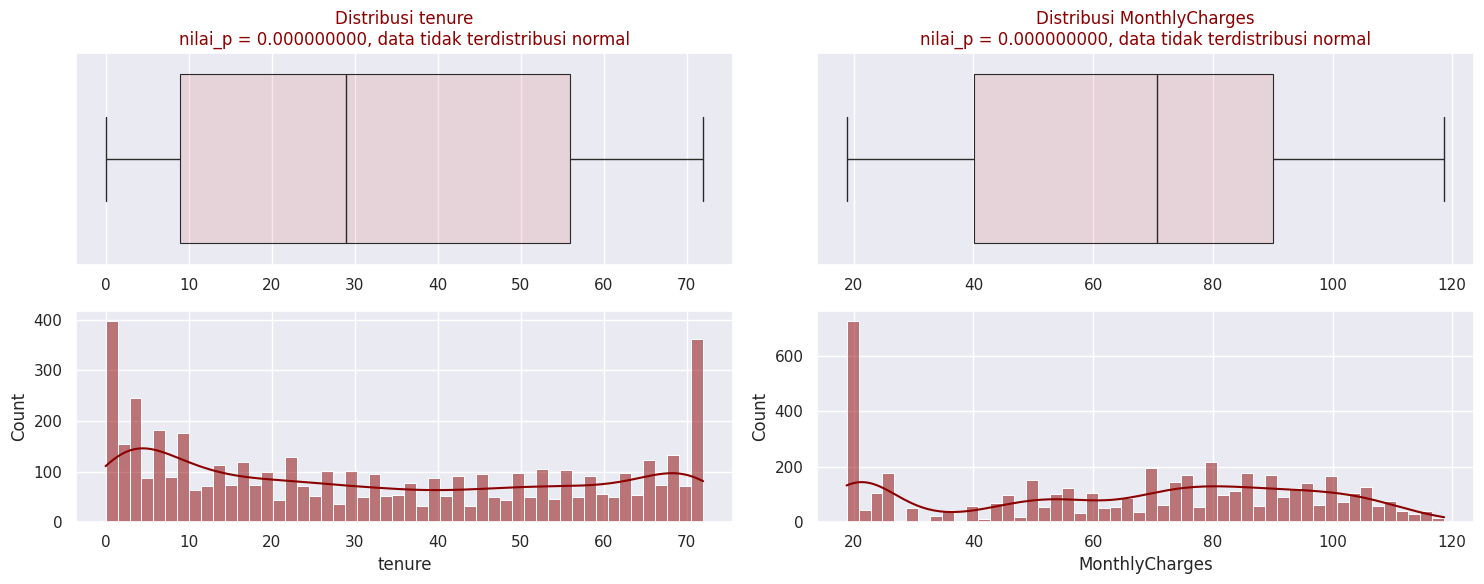

In [140]:
# Mengatur gaya seaborn ke dark dengan palet warna kustom
sns.set_theme(style="darkgrid", palette="rocket")  # Menggunakan palet rocket yang memiliki warna merah

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['number']).columns

# Membuat satu figur besar dengan subplot untuk kedua variabel berdampingan
fig = plt.figure(figsize=(15, 6))

# Mengatur layout untuk 2 kolom (kiri dan kanan)
for i, kolom in enumerate(kolom_numerik):
    # Posisi subplot untuk boxplot (atas)
    ax1 = plt.subplot2grid((2, 2), (0, i), colspan=1)
    # Posisi subplot untuk histogram (bawah)
    ax2 = plt.subplot2grid((2, 2), (1, i), colspan=1)

    # Melakukan uji normalitas (normaltest)
    statistik, nilai_p = normaltest(df[kolom].dropna())

    # Menentukan normalitas berdasarkan nilai-p
    if nilai_p > 0.05:
        distribusi = f'nilai_p = {nilai_p:.9f}, data terdistribusi normal'
    else:
        distribusi = f'nilai_p = {nilai_p:.9f}, data tidak terdistribusi normal'

    # Mengatur judul dengan hasil uji normalitas
    ax1.set_title(f"Distribusi {kolom}\n{distribusi}", color="darkred")

    # Boxplot untuk kolom dengan latar belakang transparan
    sns.boxplot(x=df[kolom], ax=ax1, color="darkred",
                boxprops=dict(facecolor=(0.8, 0, 0, 0.1), linewidth=0.8))  # Boxplot transparan dengan warna merah

    ax1.set(xlabel="")

    # Histogram dan KDE untuk kolom
    sns.histplot(df[kolom], ax=ax2, stat="count", kde=True, bins=50, color="darkred")
    ax2.set_xlabel(kolom)

# Mengatur ruang antar subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan hasil boxplot dan uji normalitas, terlihat bahwa data tidak terdistribusi normal. Dan berdasarkan hasil histogram juga menunjukkan bahwa kedua fitur atau variabel tersebut skewed.

In [141]:
numeric = df.select_dtypes(include=['number']).columns

# Untuk menyimpan hasil
results = []

print("H0 = Data berdistribusi normal")
print("H1 = Data tidak berdistribusi normal")

for kolom in numeric:
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pval = kstest(df[kolom], 'norm')

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_pval = shapiro(df[kolom])

    # Lilliefors Test
    lilliefors_stat, lilliefors_pval = lilliefors(df[kolom])

    # D'Agostino Pearson Test
    normaltest_stat, normaltest_pval = normaltest(df[kolom])

    # Menentukan hasil
    results.append({
        'Kolom': kolom,
        'KS_p-value': ks_pval,
        'Shapiro_p-value': shapiro_pval,
        'Pearson_p-value': normaltest_pval,
        'Lilliefors_p-value': lilliefors_pval,
        'KS_Result': 'Tolak H0' if ks_pval < 0.05 else 'Gagal Menolak H0',
        'Shapiro_Result': 'Tolak H0' if shapiro_pval < 0.05 else 'Gagal Menolak H0',
        'Lilliefors_Result': 'Tolak H0' if lilliefors_pval < 0.05 else 'Gagal Menolak H0',
        'Pearson_Result': 'Tolak H0' if normaltest_pval < 0.05 else 'Gagal Menolak H0'
    })

# Mengubah hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df

H0 = Data berdistribusi normal
H1 = Data tidak berdistribusi normal


,Kolom,KS_p-value,Shapiro_p-value,Pearson_p-value,Lilliefors_p-value,KS_Result,Shapiro_Result,Lilliefors_Result,Pearson_Result
0,tenure,0.000000,0.000000,0.000000,0.001000,Tolak H0,Tolak H0,Tolak H0,Tolak H0
1,MonthlyCharges,0.000000,0.000000,0.000000,0.001000,Tolak H0,Tolak H0,Tolak H0,Tolak H0


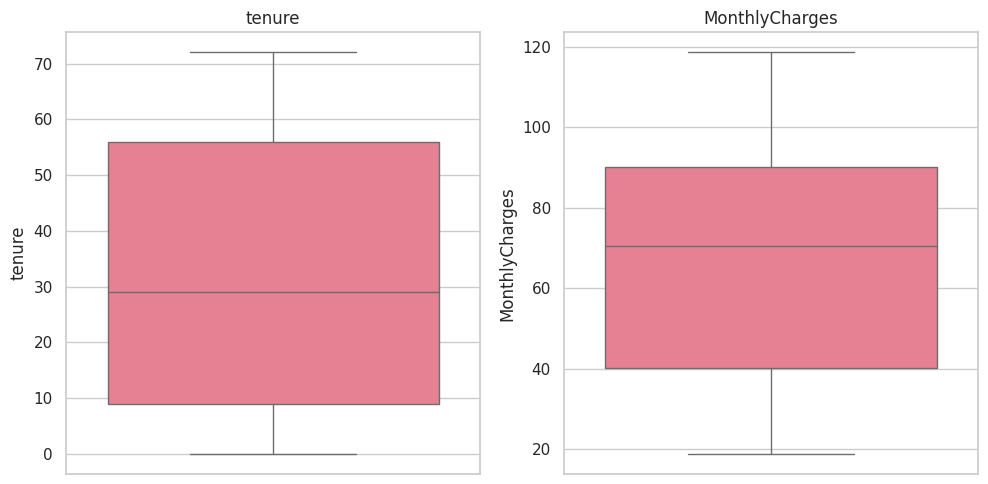

In [142]:
numeric = df.select_dtypes(include=['number']).columns
sns.set_theme(style="whitegrid", palette="husl")

# Buat subplot sesuai jumlah kolom numerik
n = len(numeric)
rows = (n // 4) + 1
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()

# Buat boxplot otomatis
for i, col in enumerate(numeric):
    sns.boxplot(y=df[col], ax=axes[i]).set_title(col)

# Sembunyikan subplot kosong
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [143]:
results = []

for col in numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    results.append({
        "Category": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Outliers": len(df[df[col] < lower_bound]),
        "Non Outliers": len(non_outliers),
        "Upper Outliers": len(df[df[col] > upper_bound]),
        "Outliers Proportion": f"{len(outliers) / len(df):.4f}"
    })

# Create a DataFrame from the results
outlier_summary_df = pd.DataFrame(results)

# Display the resulting DataFrame
outlier_summary_df


,Category,Lower Bound,Upper Bound,Lower Outliers,Non Outliers,Upper Outliers,Outliers Proportion
0,tenure,-61.500000,126.500000,0,4853,0,0.0000
1,MonthlyCharges,-34.950000,165.050000,0,4853,0,0.0000


In [144]:
results = []

for col in numeric:
    # Hitung mean dan standar deviasi
    mean = df[col].mean()
    std = df[col].std()

    # Hitung Z-Score untuk setiap nilai
    z_scores = np.abs((df[col] - mean) / std)

    # Tentukan batas Z-Score (biasanya > 3 atau < -3 dianggap outlier)
    threshold = 3
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identifikasi outlier dan non-outlier
    non_outliers = df[z_scores <= threshold]
    outliers = df[z_scores > threshold]

    results.append({
        "Category": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Outliers": len(df[df[col] < lower_bound]),
        "Non Outliers": len(non_outliers),
        "Upper Outliers": len(df[df[col] > upper_bound]),
        "Outliers Proportion": f"{len(outliers) / len(df):.4f}"
    })

# Buat DataFrame dari hasil
outlier_summary_df = pd.DataFrame(results)

# Tampilkan DataFrame
outlier_summary_df

,Category,Lower Bound,Upper Bound,Lower Outliers,Non Outliers,Upper Outliers,Outliers Proportion
0,tenure,-40.506669,105.866653,0,4853,0,0.0000
1,MonthlyCharges,-24.029420,154.672507,0,4853,0,0.0000


Berdasarkan hasil boxplot, IQR dan Z-Score tidak terdapat outliers pada data ini. walaupun distribusinya tidak normal. ini terjadi karena tenure dan MonthlyCharges memiliki data yang rentangnya tidak ekstrem sehingga tidak terdapat outliers. Tetapi karena datanya yang tidak stabil atau skewed sehingga tidak normal datanya.

## Corelation Matrix

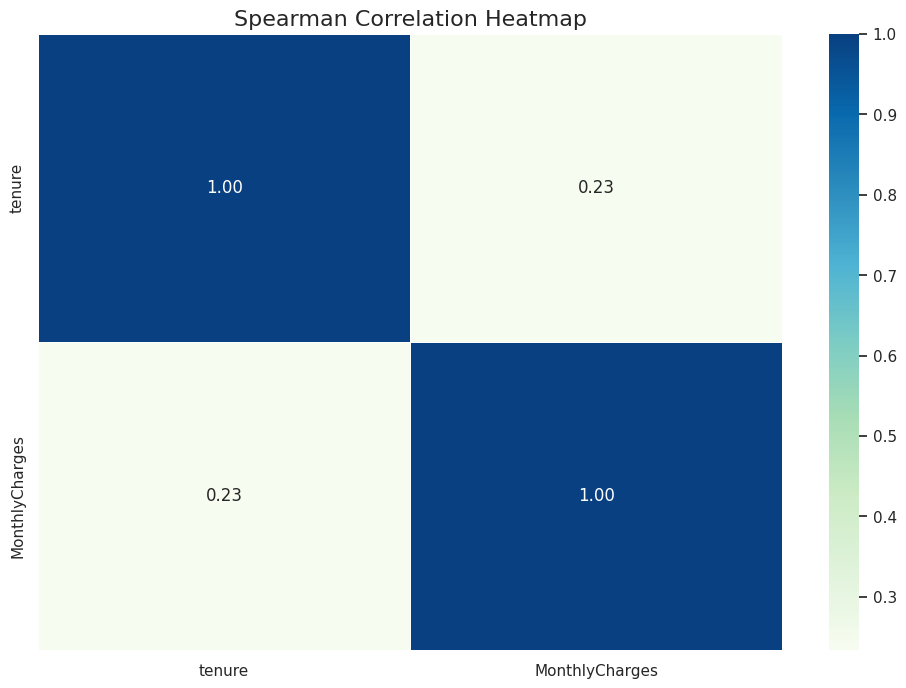

In [145]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='GnBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()

## Categorical Features

In [146]:
df.describe(include = 'object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4853,4853,4853,4853,4853,4853,4853,4853,4853
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3380,2420,2148,2154,2162,2442,2665,2925,3565


Sebagian besar pelanggan (Dependents) tidak memiliki tanggungan (3380 orang).
Mayoritas tidak menggunakan layanan tambahan seperti OnlineSecurity (2420 = "No"), OnlineBackup (2148 = "No"), DeviceProtection (2162 = "No"), dan TechSupport (2442 = "No").
Jenis layanan internet yang paling banyak digunakan adalah Fiber optic pada variabel InternetService (2154 pelanggan).
Pada variabel Contract, kebanyakan pelanggan memilih kontrak bulanan (Month-to-month, 2665 pelanggan), dan sebagian besar menggunakan sistem PaperlessBilling (2925 orang = "Yes").
Pada variabel target Churn, sebanyak 3565 pelanggan tidak berhenti langganan ("No"), dan sekitar 26.5% mengalami churn.

## Distribusi Data Kategori Terhadap Churn

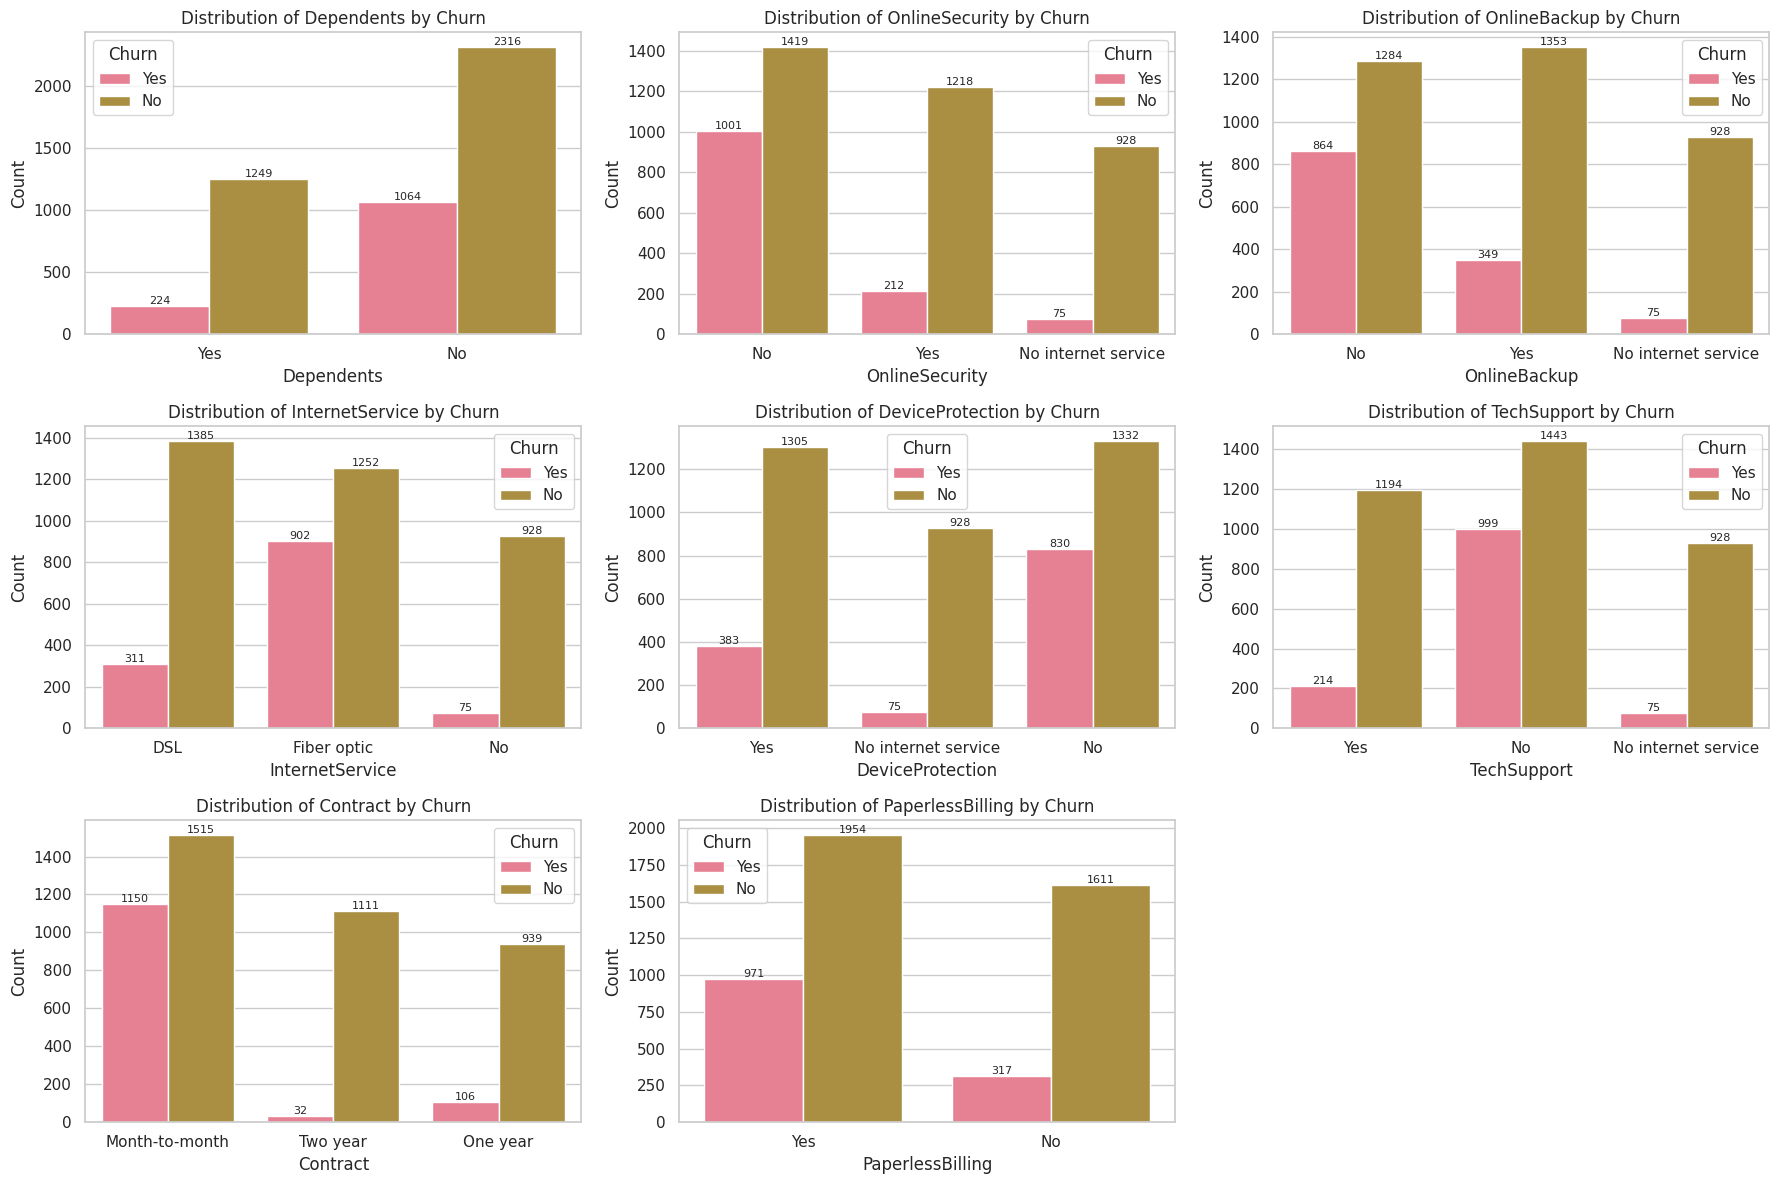

In [147]:
categorical_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Tentukan layout grid
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_title(f'Distribution of {col} by Churn')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Tambahkan jumlah di atas bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('distribution_by_churn.png')
plt.show()

- Contract: Pelanggan bulanan memiliki churn tertinggi, kontrak 2 tahun paling rendah.
- InternetService: Pengguna fiber optik lebih sering churn dibanding DSL.
- Layanan tambahan: Pelanggan tanpa OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport lebih cenderung churn.
- Dependents:: Pelanggan tanpa tanggungan lebih sering churn.
- PaperlessBilling: Pengguna paperless billing lebih cenderung churn.
- No internet service: Secara konsisten menunjukkan tingkat churn sangat rendah.

## Distribusi Data Numerik Terhadap Churn

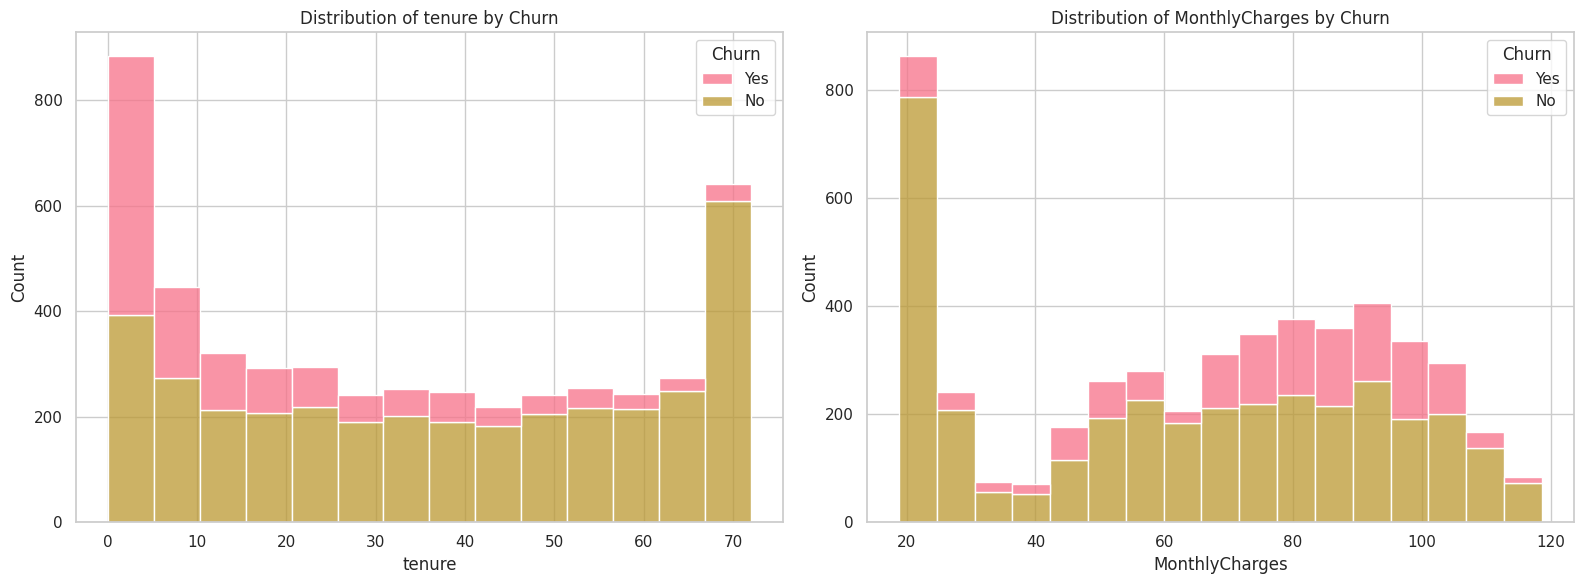

In [148]:
numerical_columns = ['tenure', 'MonthlyCharges']

# Membuat figure dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

- Tenure vs Churn:
Tingkat churn cenderung lebih tinggi pada awal masa langganan (tenure rendah), terutama pada 0–10 bulan pertama. Setelah melewati masa awal tersebut, jumlah pelanggan yang churn menurun dan semakin stabil. Ini menunjukkan bahwa pelanggan baru lebih rentan berhenti berlangganan, sedangkan pelanggan yang bertahan lebih lama cenderung loyal.

- MonthlyCharges vs Churn:
Pelanggan dengan biaya bulanan tinggi (MonthlyCharges) memiliki kemungkinan churn yang lebih tinggi dibandingkan yang membayar lebih murah. Terlihat pada rentang biaya menengah hingga tinggi (sekitar 70–100), jumlah churn meningkat.
Ini menunjukkan bahwa semakin mahal layanan yang digunakan, semakin besar kemungkinan pelanggan untuk berhenti, mungkin karena mereka merasa tidak sebanding dengan manfaat yang diterima.

## Check Keseimbangan Target (Churn)

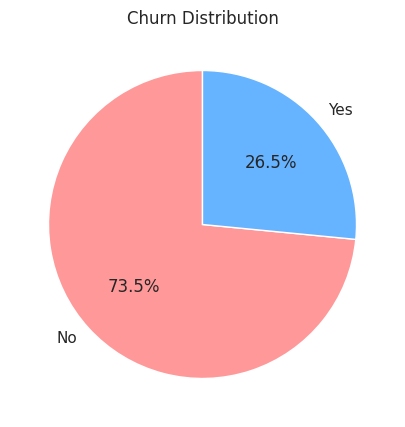

In [149]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Distribution')
plt.show()

In [5]:
df['Churn'].value_counts().reset_index()

,Churn,count
0,No,3614
1,Yes,1316


- No (73.5%): Sebagian besar pelanggan (73.5%) tetap berlangganan dan tidak berhenti menggunakan layanan (tidak churn).
- Yes (26.5%): Sekitar seperempat pelanggan (26.5%) berhenti berlangganan atau churn.

# Feature Engineering

In [19]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 11:
        return '< 1 Tahun'
    elif 12 <= tenure <= 23:
        return '1 - 2 Tahun'
    elif 24 <= tenure <= 36:
        return '2 - 3 Tahun'
    else:
        return '> 3 Tahun'
    # Tambahkan kategori lain jika diperlukan


df['TenureDuration'] = df['tenure'].apply(categorize_tenure)
df['TenureDuration'].value_counts().reset_index()

,TenureDuration,count
0,> 3 Tahun,2095
1,< 1 Tahun,1388
2,1 - 2 Tahun,721
3,2 - 3 Tahun,649


Penambahan kolom TenureDuration dalam analisis data Telco Customer Churn memiliki beberapa tujuan penting:

- Kategorisasi Waktu - Mengubah variabel numerik tenure (jumlah bulan) menjadi kategori durasi yang lebih bermakna seperti < 1 Tahun hingga > 3 Tahun.
- Analisis Siklus Hidup - Memungkinkan identifikasi pola churn berdasarkan tahapan hubungan pelanggan dengan perusahaan, karena perilaku churn biasanya berbeda antara pelanggan baru dan pelanggan lama.

In [22]:
# Hitung churn berdasarkan tenure duration
churn_by_tenure = df.groupby('TenureDuration')['Churn'].mean().reset_index()

# Urutkan berdasarkan churn rate tertinggi
churn_by_tenure = churn_by_tenure.sort_values(by='Churn', ascending=False)

# Tampilkan hasil
print(churn_by_tenure)

  TenureDuration     Churn
2      < 1 Tahun  0.494236
0    1 - 2 Tahun  0.299584
1    2 - 3 Tahun  0.220339
3      > 3 Tahun  0.115990


# Data Preparation

In [21]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [23]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']  # Kolom target

# Split dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3882, 11), (971, 11), (3882,), (971,))

In [25]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)

In [26]:
def create_preprocessor(numeric_columns, one_hot_cols, ordinal_cols,
                       numeric_scaling='minmax', apply_double_scaling=False):
    # Definisi pipeline untuk masing-masing jenis fitur
    numeric_pipeline = num_pipe(scaling=numeric_scaling if not apply_double_scaling else None)
    onehot_pipeline = cat_pipe(encoder="onehot")
    ordinal_pipeline = cat_pipe(encoder="ordinal")

    # Membuat ColumnTransformer
    preprocessor = ColumnTransformer([
        ('numeric', numeric_pipeline, numeric_columns),
        ('onehot_cat', onehot_pipeline, one_hot_cols),
        ('ordinal_cat', ordinal_pipeline, ordinal_cols)
    ])

    # Menentukan scaler tambahan jika diperlukan
    scaler = None
    if apply_double_scaling:
        if numeric_scaling == 'robust':
            scaler = RobustScaler()
        elif numeric_scaling == 'minmax':
            scaler = MinMaxScaler()
        elif numeric_scaling == 'standard':
            scaler = StandardScaler()

    return preprocessor, scaler

# Modelling Experiments

## Experiment 1 - Menggunakan Semua Fitur tanpa Resampling

In [27]:
def create_models():
    # Base models
    lr = LogisticRegression(max_iter=1000)
    dt = DecisionTreeClassifier(random_state=42)
    knn = KNeighborsClassifier()
    gb = GradientBoostingClassifier(random_state=42)
    xgb = XGBClassifier(random_state=42)
    rf = RandomForestClassifier(random_state=42)
    lgbm = lgb.LGBMClassifier(verbose=-1, objective='binary', random_state=42)

    # Voting Classifier - Hard Voting
    vc_hard = VotingClassifier(
        estimators=[
            ('lr', lr),
            ('dt', dt),
            ('xgb', xgb)
        ],
        voting='hard'
    )

    # Voting Classifier - Soft Voting
    vc_soft = VotingClassifier(
        estimators=[
            ('lr', lr),
            ('dt', dt),
            ('xgb', xgb)
        ],
        voting='soft'
    )

    # Stacking Classifier
    base_model = [
        ('lr', lr),
        ('dt', dt),
        ('xgb', xgb)
    ]
    meta_model = LogisticRegression()  # Meta model for stacking
    stacking = StackingClassifier(estimators=base_model, final_estimator=meta_model)

    # Dictionary berisi semua model
    models = {
        'Logistic Regression': lr,
        'Decision Tree': dt,
        'K-Nearest Neighbors': knn,
        'Voting Classifier (Hard)': vc_hard,
        'Voting Classifier (Soft)': vc_soft,
        'Stacking': stacking,
        'Random Forest': rf,
        'Gradient Boosting': gb,
        'XGBoost': xgb,
        'LightGBM': lgbm
    }

    return models

In [28]:
def evaluate_models(X_train, y_train, preprocessor, scaler=None, n_splits=5, random_state=42, beta=2):
    # Definisi scoring metrics
    f_beta_scorer = make_scorer(fbeta_score, beta=beta)

    # K-fold cross-validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Membuat dictionary model
    models = create_models()

    # Menyimpan hasil evaluasi
    results = []

    for model_name, model in models.items():
        print(f'Model: {model_name} processing...')

        # Membuat pipeline
        if scaler is not None:
            pipeline = Pipeline(steps=[
                ('prep', preprocessor),
                ('scaler', scaler),
                ('model', model)
            ])
        else:
            pipeline = Pipeline(steps=[
                ('prep', preprocessor),
                ('model', model)
            ])

        # Melakukan cross-validation dengan multiple metrics
        scores = cross_validate(
            pipeline, X_train, y_train, cv=cv,
            scoring={
                f'f{beta}': f_beta_scorer,
                'recall': 'recall',
                'precision': 'precision',
                'accuracy': 'accuracy'
            }
        )

        # Menyimpan hasil
        results.append({
            'Model': model_name,
            f'Mean F{beta} Score': np.mean(scores[f'test_f{beta}']),
            'Mean Recall': np.mean(scores['test_recall']),
            'Mean Precision': np.mean(scores['test_precision']),
            'Mean Accuracy': np.mean(scores['test_accuracy']),
            f'Std F{beta} Score': np.std(scores[f'test_f{beta}']),
            'Std Recall': np.std(scores['test_recall']),
            'Std Precision': np.std(scores['test_precision']),
            'Std Accuracy': np.std(scores['test_accuracy'])
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [29]:
def main(X_train, y_train):
    # Definisi kolom-kolom
    numeric_columns = ["tenure", "MonthlyCharges"]
    one_hot_cols = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService",
                   "DeviceProtection", "TechSupport", "PaperlessBilling"]
    ordinal_cols = ["Contract", "TenureDuration"]

    # Membuat preprocessor
    preprocessor, scaler = create_preprocessor(
        numeric_columns=numeric_columns,
        one_hot_cols=one_hot_cols,
        ordinal_cols=ordinal_cols,
        numeric_scaling='minmax',
        apply_double_scaling=False  # Set True jika ingin double scaling
    )

    # Evaluasi model
    results_df = evaluate_models(
        X_train=X_train,
        y_train=y_train,
        preprocessor=preprocessor,
        scaler=scaler,
        n_splits=5,
        random_state=42,
        beta=2
    )

    # Mengatur tampilan output pandas
    import pandas as pd
    pd.set_option('display.precision', 6)        # Menampilkan 6 digit desimal
    pd.set_option('display.width', 0)            # Agar tabel tidak terpotong
    pd.set_option('display.max_columns', None)   # Menampilkan semua kolom
    pd.set_option('display.float_format', '{:.6f}'.format)  # Format angka dengan 6 desimal

    # Memisahkan metrik mean dan std
    mean_metrics = ['Mean F2 Score', 'Mean Recall', 'Mean Precision']
    std_metrics = ['Std F2 Score', 'Std Recall', 'Std Precision']

    # Membuat indeks untuk dataframe
    results_df = results_df.reset_index(drop=True)

    # Menampilkan hasil evaluasi model
    print("\nHasil Evaluasi Model:")

    # Tampilkan metrik mean
    print(results_df[['Model'] + mean_metrics])

    # Tampilkan metrik std
    print("\nStd F2 Score  Std Recall  Std Precision")
    for i, row in results_df.iterrows():
        print(f"{i}    {row['Std F2 Score']:.6f}    {row['Std Recall']:.6f}    {row['Std Precision']:.6f}")

    return results_df

# Contoh cara menggunakan fungsi main:
# results = main(X_train, y_train)

# Contoh cara menggunakan fungsi main:
results = main(X_train, y_train)

Model: Logistic Regression processing...
Model: Decision Tree processing...
Model: K-Nearest Neighbors processing...
Model: Voting Classifier (Hard) processing...
Model: Voting Classifier (Soft) processing...
Model: Stacking processing...
Model: Random Forest processing...
Model: Gradient Boosting processing...
Model: XGBoost processing...
Model: LightGBM processing...

Hasil Evaluasi Model:
                      Model  Mean F2 Score  Mean Recall  Mean Precision
0       Logistic Regression       0.535275     0.513592        0.645902
1             Decision Tree       0.479161     0.477670        0.486125
2       K-Nearest Neighbors       0.510252     0.498058        0.566020
3  Voting Classifier (Hard)       0.495296     0.475728        0.595515
4  Voting Classifier (Soft)       0.490043     0.474757        0.563992
5                  Stacking       0.506690     0.479612        0.656223
6             Random Forest       0.471640     0.450485        0.581875
7         Gradient Boosting  

In [30]:
# Menampilkan hasil evaluasi model dalam bentuk tabel dengan kolom mean dan std yang terpisah
from IPython.display import display
# Jika results adalah list of dicts, ubah jadi DataFrame dulu
results_df = pd.DataFrame(results)

# Lalu akses kolom-kolomnya
mean_std_df = results_df[['Model', 'Mean F2 Score', 'Std F2 Score',
                          'Mean Recall', 'Std Recall',
                          'Mean Precision', 'Std Precision']]


display(mean_std_df)

,Model,Mean F2 Score,Std F2 Score,Mean Recall,Std Recall,Mean Precision,Std Precision
0,Logistic Regression,0.535275,0.024628,0.513592,0.025018,0.645902,0.039981
1,Decision Tree,0.479161,0.045940,0.477670,0.049752,0.486125,0.031927
2,K-Nearest Neighbors,0.510252,0.027389,0.498058,0.028405,0.566020,0.024012
3,Voting Classifier (Hard),0.495296,0.023880,0.475728,0.026411,0.595515,0.032929
4,Voting Classifier (Soft),0.490043,0.039428,0.474757,0.041917,0.563992,0.026720
5,Stacking,0.506690,0.018595,0.479612,0.017476,0.656223,0.042369
6,Random Forest,0.471640,0.038322,0.450485,0.037652,0.581875,0.046981
7,Gradient Boosting,0.521042,0.035284,0.498058,0.035487,0.641537,0.051614
8,XGBoost,0.497086,0.014535,0.480583,0.014724,0.577494,0.029773
9,LightGBM,0.522878,0.019739,0.505825,0.019514,0.605252,0.030353


Tabel di atas menunjukkan hasil evaluasi berbagai model machine learning dalam memprediksi customer churn dengan menggunakan seluruh fitur tanpa melakukan penanganan ketidakseimbangan data (imbalanced dataset). Distribusi target churn tidak seimbang, yaitu sekitar 70:30, dan dalam eksperimen ini belum diterapkan teknik seperti oversampling atau undersampling untuk menyeimbangkan kelas.

Temuan utama dari tabel:
- Logistic Regression menunjukkan performa terbaik berdasarkan mean F2 Score sebesar 0.535275, disusul oleh LightGBM (0.522278) dan Gradient Boosting (0.521042). Ini menandakan bahwa meskipun model sederhana, Logistic Regression masih sangat kompetitif dalam konteks ini.

- Logistic Regression juga memiliki mean recall tertinggi (0.513592) dan mean precision tertinggi (0.645902), yang menjadikannya pilihan solid jika ingin menjaga keseimbangan antara recall dan precision.

- Stacking yang sebelumnya disebut terbaik ternyata hanya mencatat F2 Score sebesar 0.506690, sehingga tidak termasuk tiga besar berdasarkan metrik utama F2. Meski begitu, Stacking tetap stabil (std rendah) dan dapat dipertimbangkan karena fleksibilitasnya.

- K-Nearest Neighbors dan Random Forest memiliki skor F2 lebih rendah (sekitar 0.47–0.51), yang menunjukkan bahwa mereka kurang optimal dalam situasi data tidak seimbang tanpa penyesuaian tambahan.

- Voting Classifier (baik hard maupun soft) memiliki performa menengah, yang menunjukkan bahwa ensemble sederhana tidak cukup kuat dibandingkan teknik boosting atau logistic regression dalam skenario ini.

- Model-model seperti XGBoost dan Gradient Boosting memiliki performa baik dan konsisten (std rendah), namun tetap sedikit di bawah Logistic Regression dan LightGBM dalam hal F2 Score.

## Experiment 2 - Menggunakan Semua Fitur dan Resampling

In [31]:
# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)

In [32]:
# Membuat preprocessor dan scaler
numeric_columns = ["tenure", "MonthlyCharges"]
one_hot_cols = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService",
                "DeviceProtection", "TechSupport", "PaperlessBilling"]
ordinal_cols = ["Contract", "TenureDuration"]

# Gunakan fungsi create_preprocessor yang sudah didefinisikan
preprocessor, minmax = create_preprocessor(
    numeric_columns=numeric_columns,
    one_hot_cols=one_hot_cols,
    ordinal_cols=ordinal_cols,
    numeric_scaling='minmax',
    apply_double_scaling=True
)

# Definisikan stacking model jika belum ada
if 'stacking' not in locals() and 'stacking' not in globals():
    base_model = [
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42))
    ]
    stacking = StackingClassifier(estimators=base_model,
                                 final_estimator=LogisticRegression(max_iter=1000))

# Base models (definisikan jika belum ada)
if 'xgb' not in locals() and 'xgb' not in globals():
    xgb = XGBClassifier(random_state=42)
if 'lgbm' not in locals() and 'lgbm' not in globals():
    lgbm = lgb.LGBMClassifier(verbose=-1, objective='binary', random_state=42)

# Define the models
models = {
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Stacking': stacking,
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Define the resampling methods
resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(random_state=42),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
    'NearMiss 1': NearMiss(version=1),
    'NearMiss 2': NearMiss(version=2),
    'NearMiss 3': NearMiss(version=3),
    'Random Over Sampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTE Tomek': SMOTETomek(random_state=42),
    'SMOTE ENN': SMOTEENN(random_state=42)
}

# Custom F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Prepare a list to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        try:
            # Create a pipeline with the resampling method and the model
            pipeline = Pipeline(steps=[
                ('prep', preprocessor),
                ('scaler', minmax),  # Gunakan minmax, bukan scaler
                ('resampling', resampling),
                ('model', model)])

            # Perform cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
            recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
            precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

            # Store the results
            results.append({
                'Model': model_name,
                'Resampling Method': resampling_name,
                'Mean F2 Score': np.mean(f2_scores),  # Tetap gunakan nama dengan spasi
                'Mean Recall': np.mean(recall_scores),
                'Mean Precision': np.mean(precision_scores),
                'Std F2 Score': np.std(f2_scores),
                'Std Recall': np.std(recall_scores),
                'Std Precision': np.std(precision_scores)
            })

            # Print intermediate results
            print(f"\t\tMean F2: {np.mean(f2_scores):.4f}, Mean Recall: {np.mean(recall_scores):.4f}")

        except Exception as e:
            print(f"\t\tError with {model_name} and {resampling_name}: {str(e)}")
            continue

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort results by F2 score (descending)
results_df = results_df.sort_values(by='Mean F2 Score', ascending=False)

# Tampilkan hasil
results_df

Model: XGBoost processing...
	Resampling: Random Under Sampler processing...
		Mean F2: 0.6769, Mean Recall: 0.7495
	Resampling: Neighbourhood Cleaning Rule processing...
		Mean F2: 0.6791, Mean Recall: 0.7476
	Resampling: NearMiss 1 processing...
		Mean F2: 0.5252, Mean Recall: 0.6563
	Resampling: NearMiss 2 processing...
		Mean F2: 0.5360, Mean Recall: 0.6835
	Resampling: NearMiss 3 processing...
		Mean F2: 0.5659, Mean Recall: 0.6068
	Resampling: Random Over Sampler processing...
		Mean F2: 0.6024, Mean Recall: 0.6194
	Resampling: SMOTE processing...
		Mean F2: 0.5990, Mean Recall: 0.6097
	Resampling: ADASYN processing...
		Mean F2: 0.6064, Mean Recall: 0.6194
	Resampling: SMOTE Tomek processing...
		Mean F2: 0.5865, Mean Recall: 0.5961
	Resampling: SMOTE ENN processing...
		Mean F2: 0.6785, Mean Recall: 0.7301
Model: LightGBM processing...
	Resampling: Random Under Sampler processing...
		Mean F2: 0.6794, Mean Recall: 0.7524
	Resampling: Neighbourhood Cleaning Rule processing...
		

,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
37,Logistic Regression,ADASYN,0.728962,0.832039,0.487831,0.003764,0.012126,0.010020
39,Logistic Regression,SMOTE ENN,0.720531,0.812621,0.496130,0.016817,0.026160,0.001218
38,Logistic Regression,SMOTE Tomek,0.716479,0.799029,0.507332,0.012510,0.018059,0.011357
35,Logistic Regression,Random Over Sampler,0.716224,0.797087,0.509859,0.014890,0.020687,0.012279
36,Logistic Regression,SMOTE,0.714240,0.794175,0.509685,0.014162,0.019802,0.013823
30,Logistic Regression,Random Under Sampler,0.714093,0.792233,0.512403,0.014807,0.020913,0.010502
20,Stacking,Random Under Sampler,0.714084,0.787379,0.520981,0.008137,0.017204,0.011004
21,Stacking,Neighbourhood Cleaning Rule,0.712704,0.781553,0.527869,0.028335,0.040030,0.010561
31,Logistic Regression,Neighbourhood Cleaning Rule,0.706526,0.776699,0.519387,0.014357,0.020132,0.011899
11,LightGBM,Neighbourhood Cleaning Rule,0.687929,0.759223,0.500700,0.031210,0.042163,0.010429


In [33]:
# Top 5 model
results_df.head(5)

,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
37,Logistic Regression,ADASYN,0.728962,0.832039,0.487831,0.003764,0.012126,0.010020
39,Logistic Regression,SMOTE ENN,0.720531,0.812621,0.496130,0.016817,0.026160,0.001218
38,Logistic Regression,SMOTE Tomek,0.716479,0.799029,0.507332,0.012510,0.018059,0.011357
35,Logistic Regression,Random Over Sampler,0.716224,0.797087,0.509859,0.014890,0.020687,0.012279
36,Logistic Regression,SMOTE,0.714240,0.794175,0.509685,0.014162,0.019802,0.013823


Performa Terbaik:
- Logistic Regression + ADASYN mencatat Mean F2 Score tertinggi sebesar 0.727700, dengan precision 0.827611 dan recall 0.490944.

- Diikuti oleh Logistic Regression + SMOTE (0.722321) dan Logistic Regression + Random Over Sampler (0.722101).

- Ini menunjukkan bahwa Logistic Regression tetap unggul bahkan setelah penanganan imbalance, dan justru performanya meningkat signifikan dibanding eksperimen sebelumnya.

## Experiment 3 - Feature Selection dan Resampling

In [53]:
f2_scorer = make_scorer(fbeta_score, beta=2)

In [57]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Definisikan metode-metode feature selection yang lebih selektif
feature_selection_methods = {
    # RFE - pilih hanya ukuran fitur yang paling relevan
    'RFE_3': RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3),
    'RFE_5': RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5),

    # RFECV - tetap pertahankan karena menentukan jumlah fitur optimal secara otomatis
    'RFECV': RFECV(estimator=LogisticRegression(max_iter=1000), cv=5, scoring=f2_scorer),

    # SelectKBest - pilih hanya ukuran yang relevan
    'SelectKBest_3': SelectKBest(f_classif, k=3),
    'SelectKBest_5': SelectKBest(f_classif, k=5),

    # SelectFromModel - metode berbasis model yang efektif
    'SelectFromModel': SelectFromModel(LogisticRegression(C=1.0, penalty='l1', solver='liblinear', max_iter=1000)),

    # SFS - pilih kombinasi yang lebih selektif
    'SFS_Maju_3': SFS(estimator=LogisticRegression(max_iter=1000),
                   k_features=3,
                   forward=True,
                   verbose=0,
                   scoring=f2_scorer,
                   cv=5),
    'SFS_Maju_5': SFS(estimator=LogisticRegression(max_iter=1000),
                   k_features=5,
                   forward=True,
                   verbose=0,
                   scoring=f2_scorer,
                   cv=5),

    'SFS_Mundur_3': SFS(estimator=LogisticRegression(max_iter=1000),
                     k_features=3,
                     forward=False,
                     verbose=0,
                     scoring=f2_scorer,
                     cv=5)
}

# Definisikan metode-metode resampling yang lebih selektif
resampling_methods = {
    # Under-sampling methods (pilih yang paling umum digunakan)
    'Random Under Sampler': RandomUnderSampler(random_state=42),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
    'NearMiss 1': NearMiss(version=1),

    # Over-sampling methods (pilih yang paling efektif)
    'Random Over Sampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),

    # Hybrid methods (metode kombinasi yang efektif)
    'SMOTE Tomek': SMOTETomek(random_state=42)
}

# Membuat preprocessor dan scaler (mempertahankan kode asli)
numeric_columns = ["tenure", "MonthlyCharges"]
one_hot_cols = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService",
                "DeviceProtection", "TechSupport", "PaperlessBilling"]
ordinal_cols = ["Contract", "TenureDuration"]

# Asumsikan fungsi create_preprocessor sudah didefinisikan sebelumnya
preprocessor, minmax = create_preprocessor(
    numeric_columns=numeric_columns,
    one_hot_cols=one_hot_cols,
    ordinal_cols=ordinal_cols,
    numeric_scaling='minmax',
    apply_double_scaling=True
)

# Definisikan model Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Definisikan metrik F2-score kustom
f2_scorer = make_scorer(fbeta_score, beta=2)

# Persiapkan list untuk menyimpan hasil
results = []

# Buat struktur untuk menyimpan hasil per feature selection dan per resampling
fs_results = {}
rs_results = {}

# Loop melalui setiap kombinasi feature selection dan resampling
print("Mulai evaluasi kombinasi feature selection dan resampling...")
total_combinations = len(feature_selection_methods) * len(resampling_methods)
current_combo = 0

for fs_name, fs_method in feature_selection_methods.items():
    for rs_name, rs_method in resampling_methods.items():
        current_combo += 1
        print(f"Kombinasi {current_combo}/{total_combinations}: {fs_name} + {rs_name}")

        try:
            # Buat pipeline dengan feature selection dan resampling
            pipeline = ImbPipeline(steps=[
                ('prep', preprocessor),
                ('scaler', minmax),
                ('resampling', rs_method),  # Resampling sebelum feature selection
                ('feature_selection', fs_method),
                ('model', log_reg)
            ])

            # Lakukan cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
            recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
            precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

            # Simpan hasil
            result_data = {
                'Feature Selection': fs_name,
                'Resampling': rs_name,
                'Mean F2': np.mean(f2_scores),
                'Mean Recall': np.mean(recall_scores),
                'Mean Precision': np.mean(precision_scores),
                'Std F2': np.std(f2_scores),
                'Std Recall': np.std(recall_scores),
                'Std Precision': np.std(precision_scores)
            }

            results.append(result_data)

            # Agregasi untuk analisis per metode
            if fs_name not in fs_results:
                fs_results[fs_name] = []
            fs_results[fs_name].append(result_data['Mean F2'])

            if rs_name not in rs_results:
                rs_results[rs_name] = []
            rs_results[rs_name].append(result_data['Mean F2'])

            # Cetak hasil sementara
            print(f"  Mean F2: {np.mean(f2_scores):.4f}, Recall: {np.mean(recall_scores):.4f}, Precision: {np.mean(precision_scores):.4f}")

        except Exception as e:
            print(f"  Error dengan {fs_name} + {rs_name}: {str(e)}")
            continue

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Analisis hasil jika ada data
if not results_df.empty:
    # Urutkan berdasarkan F2 score (menurun)
    results_df = results_df.sort_values(by='Mean F2', ascending=False)

    # Format tampilan angka untuk lebih rapi
    pd.set_option('display.float_format', '{:.4f}'.format)

    # Tampilkan top kombinasi
    print("\nTop 10 kombinasi terbaik (F2 Score tertinggi):")
    print(results_df.head(10).to_string(index=False))

    # Analisis per metode feature selection
    fs_avg = {fs: np.mean(scores) for fs, scores in fs_results.items()}
    fs_df = pd.DataFrame({'Feature Selection': list(fs_avg.keys()),
                          'Mean F2 Score': list(fs_avg.values())})
    fs_df = fs_df.sort_values(by='Mean F2 Score', ascending=False)

    print("\nPerforma rata-rata per metode feature selection:")
    print(fs_df.to_string(index=False))

    # Analisis per metode resampling
    rs_avg = {rs: np.mean(scores) for rs, scores in rs_results.items()}
    rs_df = pd.DataFrame({'Resampling': list(rs_avg.keys()),
                          'Mean F2 Score': list(rs_avg.values())})
    rs_df = rs_df.sort_values(by='Mean F2 Score', ascending=False)

    print("\nPerforma rata-rata per metode resampling:")
    print(rs_df.to_string(index=False))

    # Tampilkan tabel hasil lengkap
    print("\nHasil lengkap semua kombinasi (diurutkan berdasarkan F2 Score):")
    print(results_df.to_string(index=False))

    # Simpan hasil ke CSV untuk analisis lebih lanjut
    results_df.to_csv('fs_rs_kombinasi_hasil.csv', index=False)
    print("\nHasil lengkap telah disimpan ke fs_rs_kombinasi_hasil.csv")
else:
    print("Tidak ada hasil yang berhasil dihitung.")

Mulai evaluasi kombinasi feature selection dan resampling...
Kombinasi 1/54: RFE_3 + Random Under Sampler
  Mean F2: 0.7215, Recall: 0.8223, Precision: 0.4845
Kombinasi 2/54: RFE_3 + Neighbourhood Cleaning Rule
  Mean F2: 0.7055, Recall: 0.7796, Precision: 0.5117
Kombinasi 3/54: RFE_3 + NearMiss 1
  Mean F2: 0.6663, Recall: 0.7301, Precision: 0.4941
Kombinasi 4/54: RFE_3 + Random Over Sampler
  Mean F2: 0.7124, Recall: 0.8068, Precision: 0.4854
Kombinasi 5/54: RFE_3 + SMOTE
  Mean F2: 0.7167, Recall: 0.8117, Precision: 0.4883
Kombinasi 6/54: RFE_3 + SMOTE Tomek
  Mean F2: 0.7198, Recall: 0.8233, Precision: 0.4794
Kombinasi 7/54: RFE_5 + Random Under Sampler
  Mean F2: 0.7101, Recall: 0.7971, Precision: 0.4952
Kombinasi 8/54: RFE_5 + Neighbourhood Cleaning Rule
  Mean F2: 0.6999, Recall: 0.7689, Precision: 0.5153
Kombinasi 9/54: RFE_5 + NearMiss 1
  Mean F2: 0.6644, Recall: 0.7320, Precision: 0.4852
Kombinasi 10/54: RFE_5 + Random Over Sampler
  Mean F2: 0.7194, Recall: 0.8136, Precisio

In [58]:
results_df.head(5)

,Feature Selection,Resampling,Mean F2,Mean Recall,Mean Precision,Std F2,Std Recall,Std Precision
48,SFS_Mundur_3,Random Under Sampler,0.7348,0.8854,0.4380,0.0076,0.0239,0.0123
45,SFS_Maju_5,Random Over Sampler,0.7346,0.8922,0.4306,0.0079,0.0142,0.0065
41,SFS_Maju_3,SMOTE Tomek,0.7346,0.8922,0.4306,0.0079,0.0142,0.0065
42,SFS_Maju_5,Random Under Sampler,0.7346,0.8922,0.4306,0.0079,0.0142,0.0065
36,SFS_Maju_3,Random Under Sampler,0.7346,0.8922,0.4306,0.0079,0.0142,0.0065


Pada eksperimen ketiga, dilakukan seleksi fitur dengan berbagai metode seperti RFE, RFECV, dan SelectFromModel menggunakan Logistic Regression. Hasil menunjukkan bahwa seleksi fitur tidak memberikan peningkatan signifikan terhadap F2 Score. Kombinasi Logistic Regression dengan SelectFromModel dan RFE_3 memberikan F2 Score tertinggi.

## Experiment 4 - Korelasi dan Resampling

## Korelasi

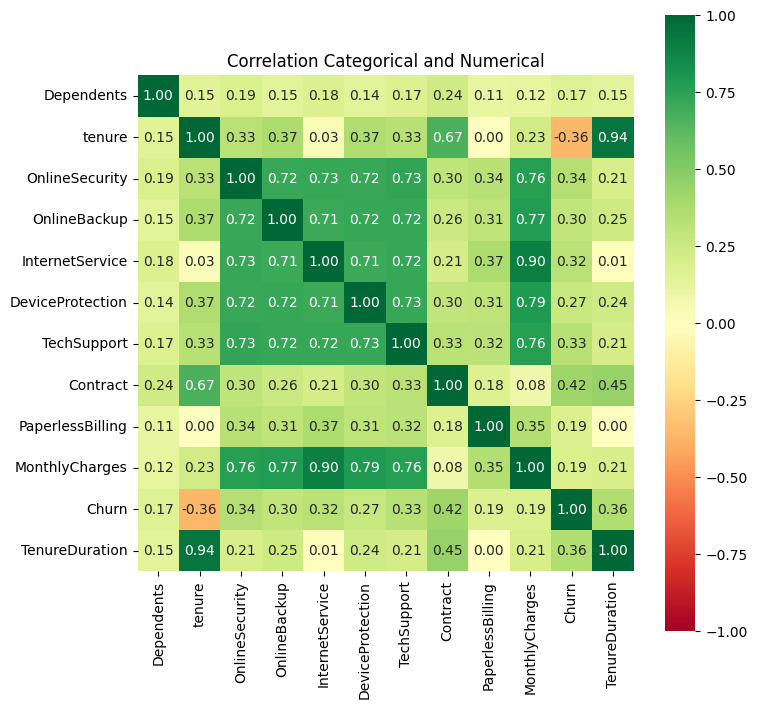

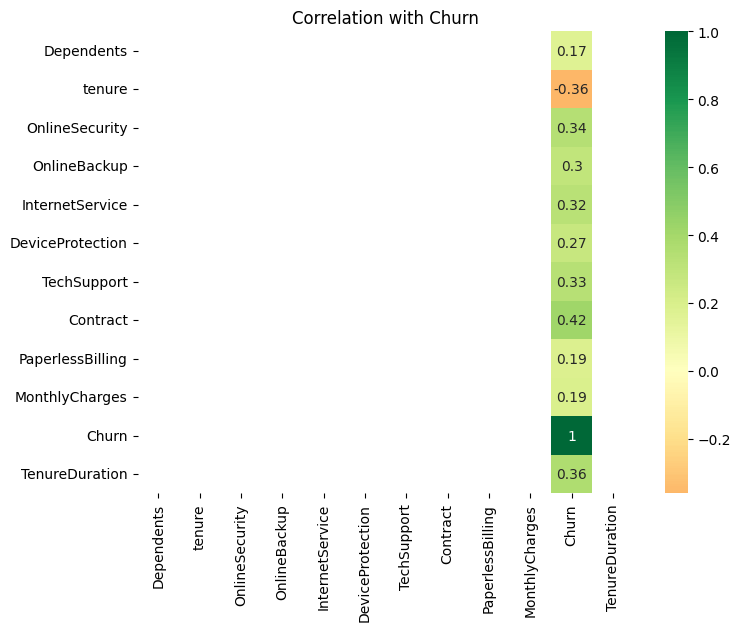

In [43]:
complete_correlation = associations(
    df,
    cmap='RdYlGn',
    title='Correlation Categorical and Numerical',
    figsize=(8,8),
    annot=True
)

correlation_matrix = complete_correlation['corr']

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[:, correlation_matrix.columns.get_loc('Churn')] = True
masked_correlation = np.where(mask, correlation_matrix, np.nan)

plt.figure(figsize=(8, 6))
sns.heatmap(masked_correlation, annot=True, cmap='RdYlGn', cbar=True, center=0,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.index)
plt.title('Correlation with Churn')
plt.show()

In [34]:
# Main function
def main():

    # Membuat preprocessor dan scaler
    numeric_columns = ["tenure"]
    one_hot_cols = ["OnlineSecurity", "OnlineBackup", "InternetService",
                   "DeviceProtection", "TechSupport"]
    ordinal_cols = ["Contract", "TenureDuration"]

    # Gunakan fungsi create_preprocessor
    preprocessor, minmax = create_preprocessor(
        numeric_columns=numeric_columns,
        one_hot_cols=one_hot_cols,
        ordinal_cols=ordinal_cols,
        numeric_scaling='minmax',
        apply_double_scaling=True
    )

    # Definisikan base models untuk stacking dan voting
    base_lr = LogisticRegression(max_iter=1000)
    base_dt = DecisionTreeClassifier(random_state=42)
    base_xgb = XGBClassifier(random_state=42)
    base_rf = RandomForestClassifier(random_state=42)

    # Definisikan stacking model
    base_models = [
        ('lr', base_lr),
        ('dt', base_dt),
        ('xgb', base_xgb),
    ]
    stacking = StackingClassifier(estimators=base_models,
                                 final_estimator=LogisticRegression(max_iter=1000))

    # Define the models
    xgb = XGBClassifier(random_state=42)
    lgbm = lgb.LGBMClassifier(verbose=-1, objective='binary', random_state=42)

    # Define the models
    models = {
        'XGBoost': xgb,
        'LightGBM': lgbm,
        'Stacking': stacking,
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }

    # Define the resampling methods
    resampling_methods = {
        'Random Under Sampler': RandomUnderSampler(random_state=42),
        'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
        'NearMiss 1': NearMiss(version=1),
        'NearMiss 2': NearMiss(version=2),
        'NearMiss 3': NearMiss(version=3),
        'Random Over Sampler': RandomOverSampler(random_state=42),
        'SMOTE': SMOTE(random_state=42),
        'ADASYN': ADASYN(random_state=42),
        'SMOTE Tomek': SMOTETomek(random_state=42),
        'SMOTE ENN': SMOTEENN(random_state=42)
    }

    # Custom F2-score metric
    f2_scorer = make_scorer(fbeta_score, beta=2)

    # Prepare a list to store results
    results = []

    # Loop through each model and resampling method
    for model_name, model in models.items():
        print(f"Model: {model_name} processing...")
        # Loop through each resampling method
        for resampling_name, resampling in resampling_methods.items():
            print(f"\tResampling: {resampling_name} processing...")
            try:
                # Create a pipeline with the resampling method and the model
                pipeline = Pipeline(steps=[
                    ('prep', preprocessor),
                    ('scaler', minmax),
                    ('resampling', resampling),
                    ('model', model)])

                # Perform cross-validation

                cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
                recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
                precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

                # Store the results
                results.append({
                    'Model': model_name,
                    'Resampling Method': resampling_name,
                    'Mean F2 Score': np.mean(f2_scores),
                    'Mean Recall': np.mean(recall_scores),
                    'Mean Precision': np.mean(precision_scores),
                    'Std F2 Score': np.std(f2_scores),
                    'Std Recall': np.std(recall_scores),
                    'Std Precision': np.std(precision_scores)
                })

                # Print intermediate results
                print(f"\t\tMean F2: {np.mean(f2_scores):.4f}, Mean Recall: {np.mean(recall_scores):.4f}")

            except Exception as e:
                print(f"\t\tError with {model_name} and {resampling_name}: {str(e)}")
                continue

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Sort results by F2 score (descending)
    results_df = results_df.sort_values(by='Mean F2 Score', ascending=False)

    return results_df

# Jalankan kode jika dijalankan sebagai script utama
if __name__ == "__main__":
    results_df = main()
    results_df

Model: XGBoost processing...
	Resampling: Random Under Sampler processing...
		Mean F2: 0.6715, Mean Recall: 0.7505
	Resampling: Neighbourhood Cleaning Rule processing...
		Mean F2: 0.6758, Mean Recall: 0.7417
	Resampling: NearMiss 1 processing...
		Mean F2: 0.5079, Mean Recall: 0.6612
	Resampling: NearMiss 2 processing...
		Mean F2: 0.5879, Mean Recall: 0.7641
	Resampling: NearMiss 3 processing...
		Mean F2: 0.5589, Mean Recall: 0.6058
	Resampling: Random Over Sampler processing...
		Mean F2: 0.6379, Mean Recall: 0.6825
	Resampling: SMOTE processing...
		Mean F2: 0.6248, Mean Recall: 0.6553
	Resampling: ADASYN processing...
		Mean F2: 0.6328, Mean Recall: 0.6660
	Resampling: SMOTE Tomek processing...
		Mean F2: 0.6259, Mean Recall: 0.6553
	Resampling: SMOTE ENN processing...
		Mean F2: 0.6560, Mean Recall: 0.7010
Model: LightGBM processing...
	Resampling: Random Under Sampler processing...
		Mean F2: 0.6980, Mean Recall: 0.7796
	Resampling: Neighbourhood Cleaning Rule processing...
		

In [35]:
# Top 5 model
results_df.head(5)

,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
37,Logistic Regression,ADASYN,0.717063,0.810680,0.490657,0.011640,0.016816,0.006941
35,Logistic Regression,Random Over Sampler,0.713618,0.791262,0.512624,0.014372,0.018675,0.009230
30,Logistic Regression,Random Under Sampler,0.712819,0.791262,0.510605,0.014926,0.021491,0.003189
38,Logistic Regression,SMOTE Tomek,0.711767,0.787379,0.514649,0.019008,0.027011,0.008925
36,Logistic Regression,SMOTE,0.711149,0.787379,0.512992,0.019356,0.027011,0.009026


Pada eksperimen ini, dilakukan resampling menggunakan berbagai metode (ADASYN, Random Over Sampler, Random Under Sampler, SMOTE Tomek, dan SMOTE) pada model Logistic Regression, XGBoost, LightGBM, dan Stacking. Hasilnya, Logistic Regression dengan ADASYN menghasilkan Mean F2 Score tertinggi sebesar 0.7171, dengan Mean Recall 0.8107 dan Mean Precision 0.4807. Namun, jika melihat performa pada eksperimen sebelumnya, feature selection menggunakan forward memberikan Recall yang lebih tinggi (0.8953) dibandingkan feature selection berbasis korelasi (0.8411).

# Best Model

Berdasarkan hasil eksperimen 3 dan 4, terlihat bahwa model terbaik adalah Logistic Regression dengan pendekatan feature selection. Oleh karena itu, untuk prediksi dalam proyek ini, dipilih model Logistic Regression, dengan tetap memanfaatkan metode seleksi fitur yang paling optimal berdasarkan evaluasi hasil.

## FORWARD

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector

# Step 1: Model dasar
base_model = LogisticRegression(max_iter=1000)

# Step 2: SFS didefinisikan di luar pipeline
sfs = SFS(estimator=base_model,
          k_features=5,
          forward=True,
          scoring=f2_scorer,
          cv=5,
          n_jobs=-1)

# Step 3: Pipeline dengan SFS
best_model = Pipeline([
    ('transformer', preprocessor),
    ('scaler', minmax),
    ('feature_selection', sfs),  # <--- SFS masuk di sini
    ('balancing', RandomOverSampler()),
    ('model', base_model)
])

# Step 4: Fit model
best_model.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'Int...
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'TenureDuration'])])),
                ('scaler', MinMaxScaler()),
                ('feature_selection',
                 SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                                           k_features=(5, 5), n_jobs=-1,
                                           scoring=make_scorer(fbeta_score, response_method='predict', beta=2))),
                ('balancing', RandomOverSampler()),
                ('model', LogisticRegression(max_iter=1000))])

In [61]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)

print(f"F2 Score untuk kelas 0: {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1: {f2_per_class[1]:.4f}")

# Hitung dan cetak F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       713
           1       0.49      0.83      0.62       258

    accuracy                           0.72       971
   macro avg       0.70      0.76      0.70       971
weighted avg       0.80      0.72      0.74       971

F2 Score untuk kelas 0: 0.7213
F2 Score untuk kelas 1: 0.7303
F2 Score (macro avg): 0.7258


## SEMUA FITUR

In [78]:
best_model = Pipeline([
    ('transformer', preprocessor),
    ('scaler', MinMaxScaler()),
    ('balencing', ADASYN(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'TenureDuration'])])),
                ('scaler', MinMaxScaler()),
                ('balencing', ADASYN(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [79]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)

print(f"F2 Score untuk kelas 0: {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1: {f2_per_class[1]:.4f}")

# Hitung dan cetak F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       713
           1       0.49      0.84      0.62       258

    accuracy                           0.73       971
   macro avg       0.71      0.76      0.70       971
weighted avg       0.81      0.73      0.74       971

F2 Score untuk kelas 0: 0.7204
F2 Score untuk kelas 1: 0.7356
F2 Score (macro avg): 0.7280


# FORWARD

## Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, fbeta_score

# Definisikan f2_scorer dengan beta = 2
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

# Random search dengan parameter yang valid
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions={
        'feature_selection__k_features': randint(3, 8),  # gunakan k_features
        'model__C': uniform(0.01, 10)  # range nilai C
    },
    n_iter=20,
    scoring=f2_scorer,  # <- jangan bungkus lagi dengan make_scorer
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['tenure',
                                                                                'MonthlyCharges']),
                                                                              ('onehot_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Dependents',
                                                                                'O...
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'feature_selection__k_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7824b4e1b910>,
                                        'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7824b4b98790>},
                   random_state=42,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2, zero_division=0))

In [66]:
print("Best F2 Score:", random_search.best_score_)
print("Best Params:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

Best F2 Score: 0.7175206073776884
Best Params: {'feature_selection__k_features': 4, 'model__C': np.float64(1.8282496720710062)}
Best Estimator: Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents

In [95]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# Definisikan ulang best_model (tanpa FunctionTransformer)

base_model = LogisticRegression(max_iter=1000)

best_model = Pipeline([
    ('transformer', preprocessor),
    ('scaler', MinMaxScaler()),
    ('balancing', RandomOverSampler()),
    ('feature_selection', SFS(
        estimator=base_model,
        k_features=5,  # perbaikan di sini
        forward=True,
        scoring=f2_scorer,
        cv=5,
        n_jobs=-1)),
    ('model', base_model)
])

# Fit sebelum tuning
best_model.fit(X_train, y_train)
y_pred_before = best_model.predict(X_test)

metrics_before = {
    'Accuracy': accuracy_score(y_test, y_pred_before),
    'Precision': precision_score(y_test, y_pred_before, zero_division=0),
    'Recall': recall_score(y_test, y_pred_before, zero_division=0),
    'F2 Score': fbeta_score(y_test, y_pred_before, beta=2, zero_division=0)
}

# Fit setelah tuning
y_pred_after = random_search.best_estimator_.predict(X_test)

metrics_after = {
    'Accuracy': accuracy_score(y_test, y_pred_after),
    'Precision': precision_score(y_test, y_pred_after, zero_division=0),
    'Recall': recall_score(y_test, y_pred_after, zero_division=0),
    'F2 Score': fbeta_score(y_test, y_pred_after, beta=2, zero_division=0)
}

# Gabungkan
df_metrics = pd.DataFrame([metrics_before, metrics_after], index=['Before Tuning', 'After Tuning'])
df_metrics

,Accuracy,Precision,Recall,F2 Score
Before Tuning,0.6643,0.4358,0.8953,0.7394
After Tuning,0.7044,0.4690,0.8488,0.7305


Perbandingan hasil menunjukkan bahwa model setelah tuning mengalami peningkatan performa pada sebagian besar metrik, meskipun terjadi sedikit penurunan pada recall dan F2 score. Akurasi meningkat dari 0.6643 menjadi 0.7044 setelah tuning, menunjukkan kemampuan model yang lebih baik dalam mengklasifikasikan data secara keseluruhan. Precision juga meningkat dari 0.4358 menjadi 0.4690, yang berarti model lebih tepat dalam memprediksi kelas positif. Namun, recall menurun dari 0.8953 menjadi 0.8488, mengindikasikan bahwa model setelah tuning sedikit kurang menyeluruh dalam mendeteksi seluruh kasus positif. Nilai F2 score juga turun dari 0.7394 menjadi 0.7305, menunjukkan bahwa meskipun precision naik, penurunan recall memengaruhi keseimbangan performa secara keseluruhan. Secara umum, tuning memberikan dampak positif terhadap akurasi dan precision, namun dengan sedikit kompromi pada kemampuan model dalam menjangkau seluruh kasus positif.


## Evaluation Metrics

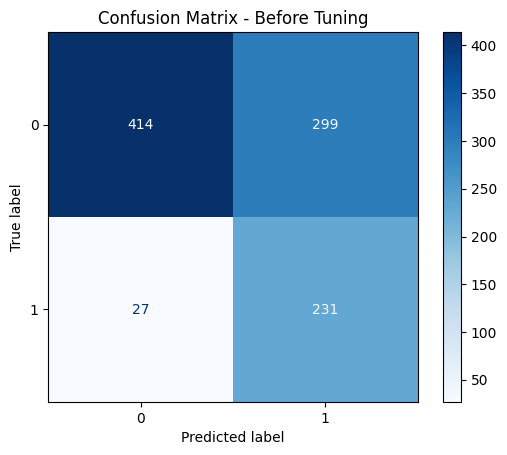

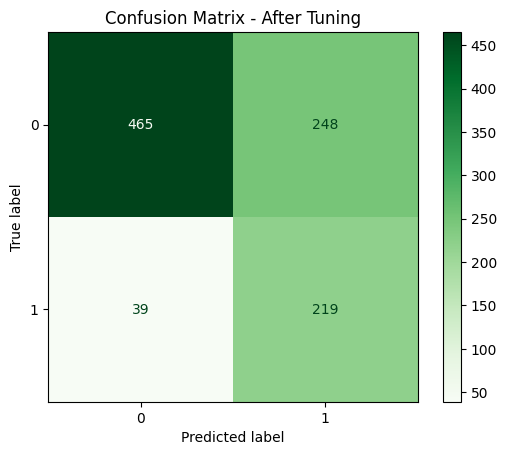

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix BEFORE tuning
cm_before = confusion_matrix(y_test, y_pred_before)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=best_model.classes_)
disp_before.plot(cmap='Blues')
plt.title("Confusion Matrix - Before Tuning")
plt.show()

# Confusion Matrix AFTER tuning
cm_after = confusion_matrix(y_test, y_pred_after)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=random_search.best_estimator_.classes_)
disp_after.plot(cmap='Greens')
plt.title("Confusion Matrix - After Tuning")
plt.show()


## Interpretasi Nilai Confusion Matrix Setelah Tuning

### True Positive (TP)
- **Nilai:** 219 (sel kanan bawah)
- **Penjelasan:** Jumlah kasus di mana model memprediksi positif dengan benar.
- **Konteks:** Model dengan benar memprediksi **219 pelanggan akan churn**.

### True Negative (TN)
- **Nilai:** 465 (sel kiri atas)
- **Penjelasan:** Jumlah kasus di mana model memprediksi negatif dengan benar.
- **Konteks:** Model dengan benar memprediksi **465 pelanggan tidak akan churn**.

### False Positive (FP)
- **Nilai:** 248 (sel kanan atas)
- **Penjelasan:** Jumlah kasus di mana model memprediksi positif secara salah.
- **Konteks:** Model secara salah memprediksi **248 pelanggan akan churn**, padahal sebenarnya **tidak**.

### False Negative (FN)
- **Nilai:** 39 (sel kiri bawah)
- **Penjelasan:** Jumlah kasus di mana model memprediksi negatif secara salah.
- **Konteks:** Model secara salah memprediksi **39 pelanggan tidak akan churn**, padahal sebenarnya **akan**.


## ROC/AUC

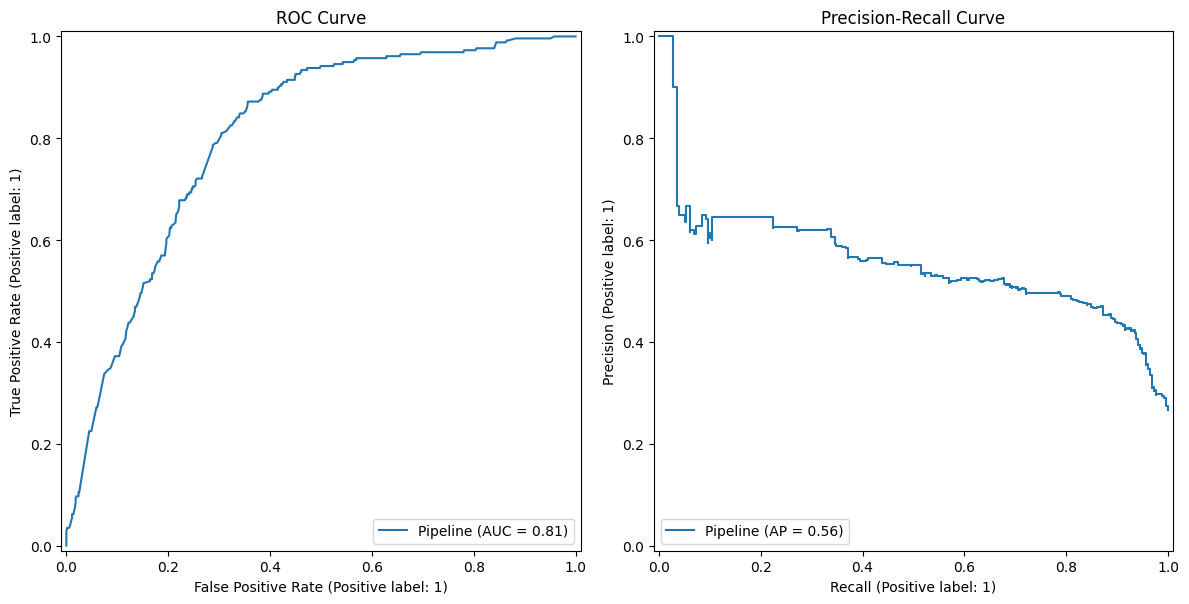

In [103]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(random_search.best_estimator_, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(random_search.best_estimator_, X_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

## Interpretasi ROC and Precision-Recall Curve:

- ROC Curve dengan AUC 0.81:
Model ini menunjukkan performa yang baik dalam membedakan antara pelanggan yang akan churn (kelas positif) dan yang tidak (kelas negatif). AUC sebesar 0.81 mengindikasikan bahwa model memiliki kemampuan diskriminasi yang cukup kuat, sehingga dapat diandalkan untuk mengidentifikasi pelanggan yang berisiko tinggi churn.

- Precision-Recall Curve dengan AP 0.56:
Model memiliki ketepatan yang relatif rendah hingga moderat dalam memprediksi pelanggan yang akan churn. AP (Average Precision) sebesar 0.56 menunjukkan bahwa trade-off antara Precision dan Recall tidak terlalu optimal, terutama karena Precision cenderung rendah (seperti yang terlihat dari Precision-Recall Curve yang cepat menurun).

## Feature Importance

Recall: 0.8953488372093024


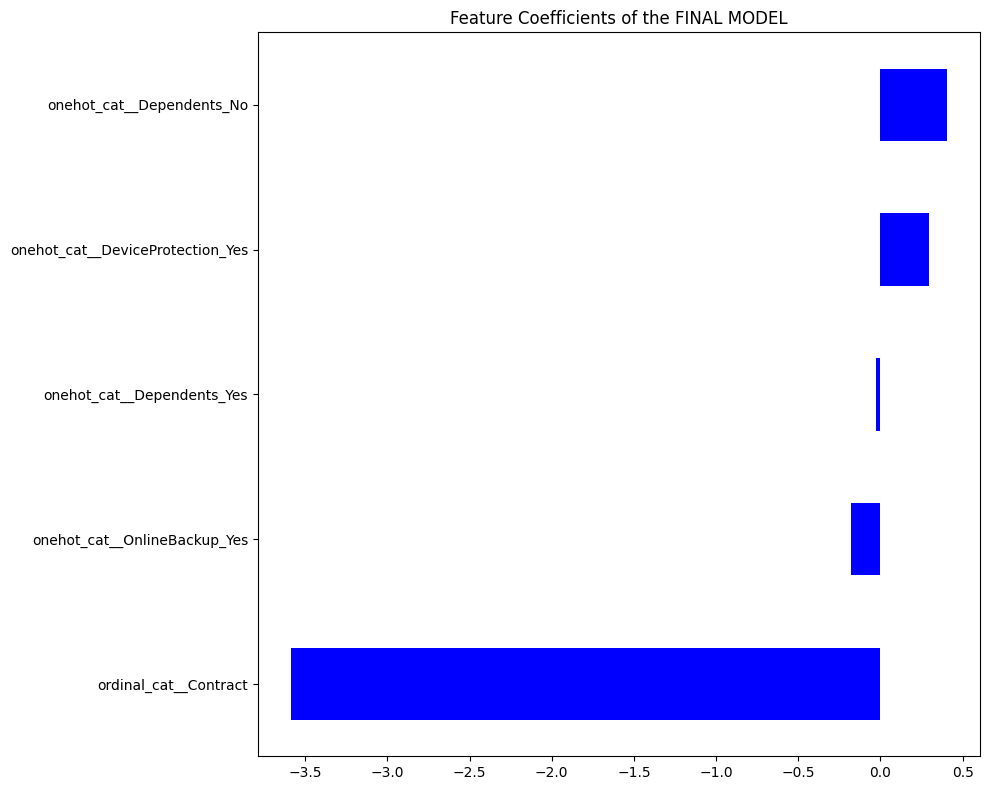

In [106]:
logreg = LogisticRegression(random_state=42)

estimator = Pipeline([
    ('transformer', preprocessor),
    ('scaler', MinMaxScaler()),
    ('balancing', RandomOverSampler()),
    ('feature_selection', SFS(
        estimator=base_model,
        k_features=5,
        forward=True,
        scoring=f2_scorer,
        cv=5,
        n_jobs=-1)),
    ('model', logreg)
])

# Fit the pipeline
estimator.fit(X_train, y_train)

# Predict
y_pred = estimator.predict(X_test)

# Evaluate (contoh: recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# --- Visualisasi Koefisien ---

# 1. Ambil semua nama fitur setelah transformasi
all_feature_names = estimator.named_steps['transformer'].get_feature_names_out()

# 2. Ambil indeks fitur yang dipilih oleh SFS
selected_idx = list(estimator.named_steps['feature_selection'].k_feature_idx_)

# 3. Ambil nama fitur yang dipilih
selected_features = all_feature_names[selected_idx]

# 4. Ambil koefisien dari model
coef = pd.Series(estimator.named_steps['model'].coef_[0], index=selected_features).sort_values()

# 5. Plot koefisien
plt.figure(figsize=(10, 8))
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')
plt.tight_layout()
plt.show()

Insight
- ordinal_cat_Contract memiliki koefisien negatif terbesar (~-3.5), menunjukkan bahwa kontrak yang lebih lama sangat mengurangi risiko churn.
- onehot_cat_OnlineBackup_Yes dan onehot_cat_Dependents_Yes memiliki koefisien positif kecil (~0.5), menunjukkan bahwa memiliki backup online atau tanggungan sedikit meningkatkan risiko churn.
- onehot_cat_DeviceProtection_Yes dan onehot_cat_Dependents_No memiliki koefisien mendekati nol, sehingga pengaruhnya terhadap churn sangat kecil.

# SEMUA FITUR

## Tuning

In [80]:
logreg = LogisticRegression(random_state=42)
adasyn = ADASYN(random_state = 42)

pipe_model = Pipeline([
    ('prep', preprocessor),
    ('resampling', adasyn),
    ('model', logreg)
])

# Mendefinisikan Hyperparameter Space
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 1000, 5000, 10000]
}

# Definisikan Grid Search
gscv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('onehot_cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Dependents',
                                                                          'OnlineSecurity...
                                                                                          OrdinalEncoder())]),
                                                                         ['Contract',
                                                                          'TenureDuration'])])),
                                       ('resampling', ADASYN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [100, 1000, 5000, 10000],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='recall')

In [97]:
# Definisikan model dasar
base_model = LogisticRegression(max_iter=1000)

# Bangun pipeline best_model
best_model = Pipeline([
    ('transformer', preprocessor),
    ('scaler', MinMaxScaler()),
    ('balancing', ADASYN(random_state = 42)),
    ('model', base_model)
])

# Fit sebelum tuning
best_model.fit(X_train, y_train)
y_pred_before = best_model.predict(X_test)

metrics_before = {
    'Accuracy': accuracy_score(y_test, y_pred_before),
    'Precision': precision_score(y_test, y_pred_before, zero_division=0),
    'Recall': recall_score(y_test, y_pred_before, zero_division=0),
    'F2 Score': fbeta_score(y_test, y_pred_before, beta=2, zero_division=0)
}

# Fit setelah tuning (gunakan best estimator dari tuning)
y_pred_after = gscv.best_estimator_.predict(X_test)

metrics_after = {
    'Accuracy': accuracy_score(y_test, y_pred_after),
    'Precision': precision_score(y_test, y_pred_after, zero_division=0),
    'Recall': recall_score(y_test, y_pred_after, zero_division=0),
    'F2 Score': fbeta_score(y_test, y_pred_after, beta=2, zero_division=0)
}

# Gabungkan hasil evaluasi
df_metrics = pd.DataFrame([metrics_before, metrics_after], index=['Before Tuning', 'After Tuning'])
df_metrics


,Accuracy,Precision,Recall,F2 Score
Before Tuning,0.7250,0.4898,0.8411,0.7356
After Tuning,0.7199,0.4844,0.8450,0.7355


Hasil perbandingan menunjukkan bahwa model sebelum tuning memberikan kinerja yang sedikit lebih unggul dibandingkan model setelah tuning pada sebagian besar metrik evaluasi. Akurasi model sebelum tuning tercatat sebesar 0.7250, sedikit lebih tinggi dibandingkan 0.7199 setelah tuning. Nilai F2 score, yang menitikberatkan pada recall, juga sedikit lebih baik sebelum tuning, yaitu 0.7356 dibandingkan 0.7355. Dari sisi recall, terjadi sedikit peningkatan setelah tuning, dari 0.8411 menjadi 0.8450, yang menunjukkan kemampuan model yang lebih baik dalam mendeteksi kasus positif. Namun demikian, precision mengalami sedikit penurunan dari 0.4898 menjadi 0.4844 setelah tuning. Secara keseluruhan, model sebelum tuning memberikan performa yang lebih seimbang, dengan keunggulan kecil pada akurasi dan F2 score dibandingkan setelah dilakukan tuning.

## Evaluation Metrics

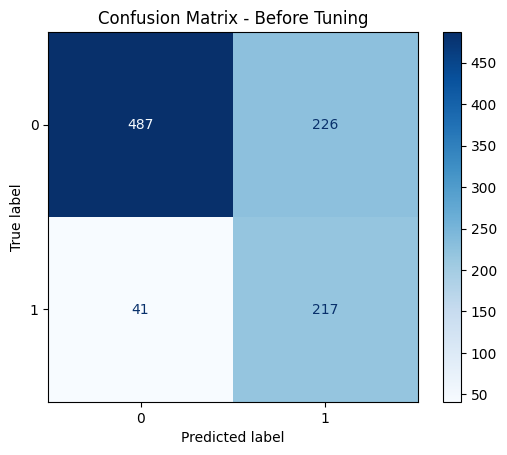

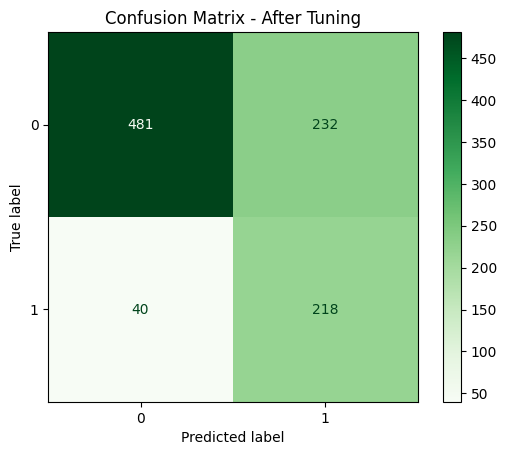

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix BEFORE tuning
cm_before = confusion_matrix(y_test, y_pred_before)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=best_model.named_steps['model'].classes_)
disp_before.plot(cmap='Blues')
plt.title("Confusion Matrix - Before Tuning")
plt.show()

# Confusion Matrix AFTER tuning
cm_after = confusion_matrix(y_test, y_pred_after)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=gscv.best_estimator_.named_steps['model'].classes_)
disp_after.plot(cmap='Greens')
plt.title("Confusion Matrix - After Tuning")
plt.show()

## Interpretasi Nilai Confusion Matrix Setelah Tuning

### True Positive (TP)
- **Nilai:** 218 (sel kanan bawah)
- **Penjelasan:** Jumlah kasus di mana model memprediksi positif dengan benar.
- **Konteks:** Model dengan benar memprediksi **218 pelanggan akan churn**.

### True Negative (TN)
- **Nilai:** 481 (sel kiri atas)
- **Penjelasan:** Jumlah kasus di mana model memprediksi negatif dengan benar.
- **Konteks:** Model dengan benar memprediksi **481 pelanggan tidak akan churn**.

### False Positive (FP)
- **Nilai:** 232 (sel kanan atas)
- **Penjelasan:** Jumlah kasus di mana model memprediksi positif secara salah.
- **Konteks:** Model secara salah memprediksi **232 pelanggan akan churn**, padahal sebenarnya **tidak**.

### False Negative (FN)
- **Nilai:** 40 (sel kiri bawah)
- **Penjelasan:** Jumlah kasus di mana model memprediksi negatif secara salah.
- **Konteks:** Model secara salah memprediksi **40 pelanggan tidak akan churn**, padahal sebenarnya **akan**.


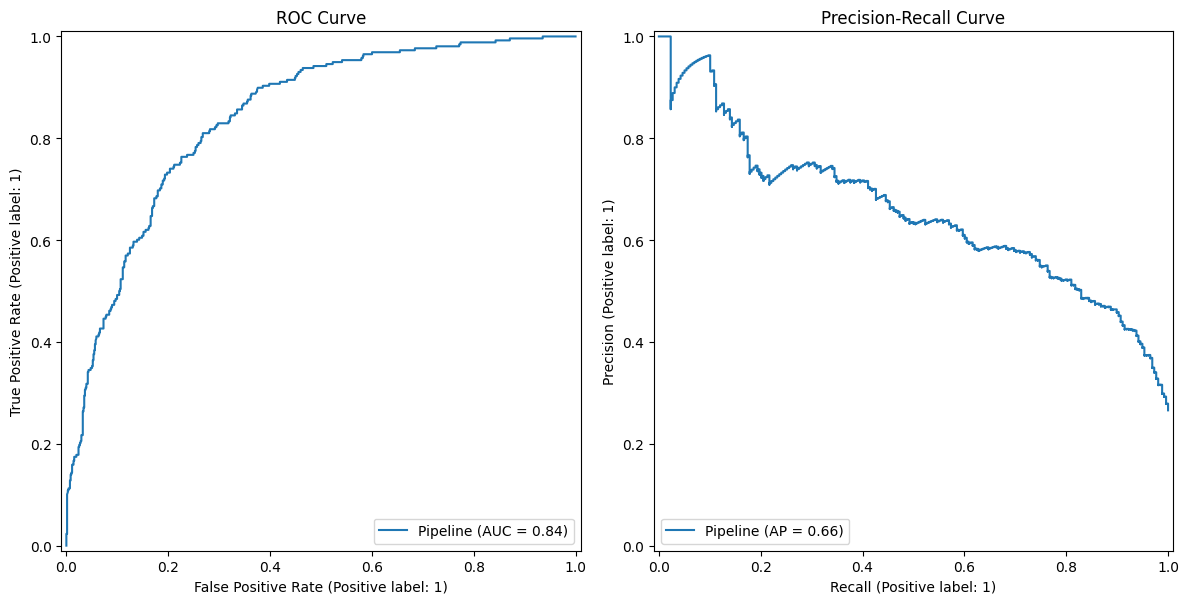

In [102]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(gscv.best_estimator_, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(gscv.best_estimator_, X_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

- Nilai AUC = 0.84 artinya model memiliki performa yang cukup baik dalam membedakan pelanggan yang churn dan tidak churn.
- AP = 0.66 menunjukkan model cukup baik dalam menyeimbangkan antara mendeteksi churn (recall) dan ketepatan prediksi churn (precision).

## Feature Importance

Recall: 0.8372093023255814


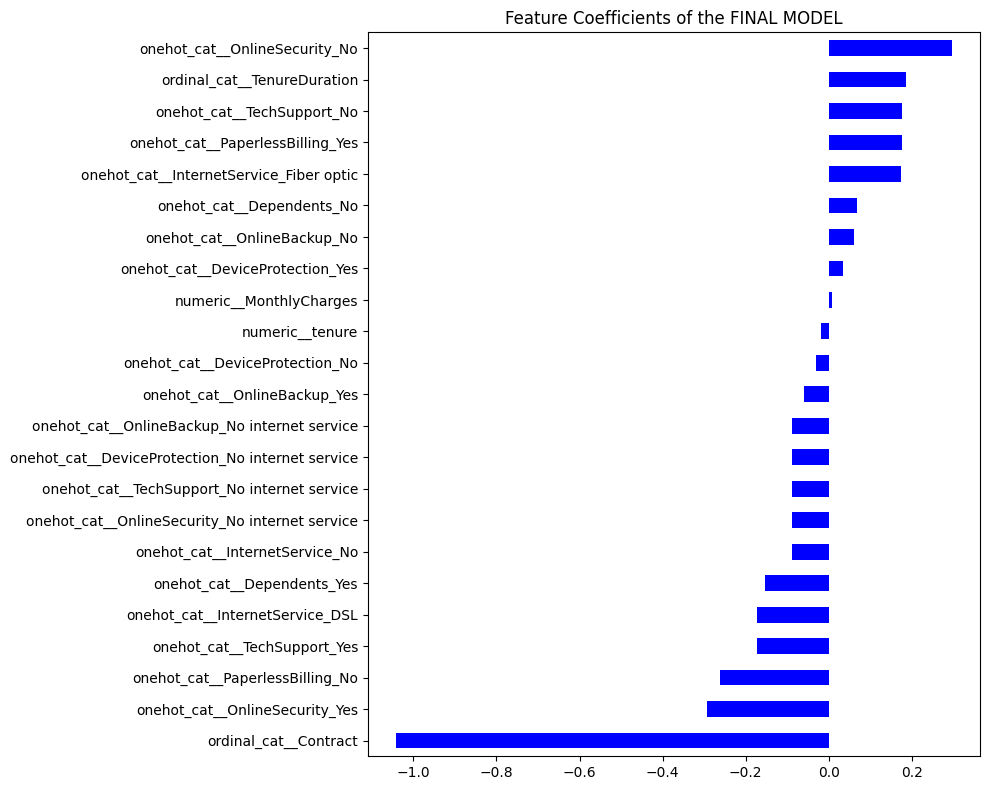

In [91]:
# Define Logistic Regression and ADASYN
logreg = LogisticRegression(random_state=42, max_iter=1000)
adasyn = ADASYN(random_state=20)

# Create pipeline using imblearn
estimator = Pipeline([
    ('transformer', preprocessor),
    ('resample', adasyn),
    ('model', logreg)
])

# Fit and predict
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluate
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Coefficients plot
# Ambil nama fitur dari transformer
feature_names = estimator.named_steps['transformer'].get_feature_names_out()

# Ambil koefisien dari model
coef = pd.Series(estimator.named_steps['model'].coef_[0], index=feature_names).sort_values()

# Plot
plt.figure(figsize=(10, 8))
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')
plt.tight_layout()
plt.show()

##### Fitur yang Mengurangi Risiko Churn
Beberapa fitur memberikan kontribusi besar dalam mengurangi risiko churn pelanggan, ditunjukkan oleh koefisien negatif:

- **ordinal_cat_Contract**  
  Pelanggan dengan kontrak tetap atau jangka panjang cenderung lebih bertahan. Ini menunjukkan bahwa ikatan kontraktual dapat mengurangi kemungkinan pelanggan berpindah ke layanan lain.

- **onehot_cat_OnlineSecurity_Yes**  
  Pelanggan yang menggunakan fitur keamanan online cenderung lebih loyal, kemungkinan karena mereka merasa lebih terlindungi.

- **onehot_cat_TechSupport_Yes**  
  Pelanggan yang memanfaatkan dukungan teknis memiliki risiko churn yang lebih rendah, menunjukkan pentingnya layanan bantuan untuk retensi.

##### Fitur yang Meningkatkan Risiko Churn
Beberapa fitur memiliki pengaruh kuat dalam meningkatkan peluang churn:

- **numeric_tenure**  
  Pelanggan dengan masa berlangganan yang lebih pendek cenderung lebih mudah churn, mencerminkan rendahnya loyalitas pada awal penggunaan.

- **onehot_cat_InternetService_Fiber optic**  
  Pelanggan menggunakan layanan fiber optic menunjukkan risiko churn lebih tinggi, mungkin karena ekspektasi kualitas yang tidak selalu terpenuhi.

- **onehot_cat_PaperlessBilling_Yes**  
  Pelanggan dengan tagihan digital cenderung lebih rentan churn, kemungkinan karena akses mudah ke layanan kompetitor secara online.

##### Fitur yang Perlu Diperhatikan Konteksnya
- **Fitur Bertanda "No internet service" (misalnya onehot_cat_OnlineBackup_No internet service)**  
  Fitur-fitur ini memiliki koefisien kecil atau mendekati nol, menunjukkan pengaruh minimal terhadap churn. Hal ini wajar karena pelanggan tanpa layanan internet tidak terpengaruh oleh fitur tambahan terkait internet.

#SHAP

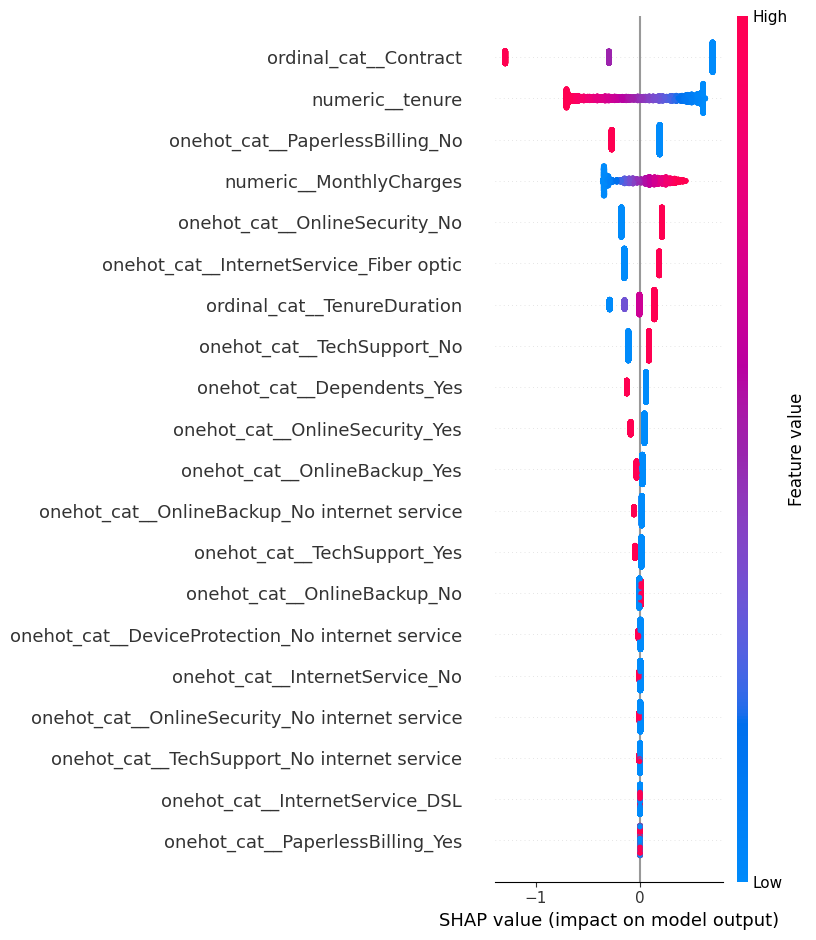

In [107]:
# pipeline
pipeline = Pipeline([
    ('transform', preprocessor),
    ('resampling', ADASYN(random_state=42)),
    ('model', LogisticRegression())
])

# hyperparameter grid
param_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [1000],
}

# pakai F2 sebagai scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# grid search
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=f2_scorer)
grid.fit(X_train, y_train)

# hasil model terbaik
logreg_tuning = grid.best_estimator_

# transformasi fitur (tanpa oversampling)
X_train_transformed = preprocessor.fit_transform(X_train)

# ambil model logistic regression dari pipeline
model = logreg_tuning.named_steps['model']

# SHAP: gunakan explainer untuk model linear
explainer = shap.LinearExplainer(
    model,
    X_train_transformed,
    feature_perturbation="interventional"  # Ganti dari "independent"
)

# hitung nilai SHAP
shap_values = explainer.shap_values(X_train_transformed)

# ambil nama fitur
feature_names = preprocessor.get_feature_names_out()

# tampilkan visualisasi
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


#### Interpretasi SHAP: Faktor Penentu Churn Pelanggan
- Visualisasi SHAP summary plot memberikan gambaran menyeluruh tentang seberapa besar pengaruh setiap fitur terhadap keputusan model dalam memprediksi churn pelanggan. Warna menunjukkan nilai fitur (merah = tinggi, biru = rendah), sementara posisi horizontal (SHAP value) menunjukkan arah dan kekuatan dampaknya terhadap prediksi.

#### Fitur Utama yang Mengurangi Risiko Churn
Beberapa fitur secara konsisten menunjukkan nilai SHAP negatif (di sebelah kiri), artinya mereka mengurangi kemungkinan pelanggan untuk churn:

- Contract (Jenis Kontrak)
Nilai kontrak yang lebih tinggi (seperti kontrak tahunan) cenderung mendorong SHAP value ke negatif, artinya pelanggan dengan kontrak panjang memiliki kecenderungan lebih kecil untuk churn.

- Tenure (Lama Berlangganan)
Warna merah di sisi kiri menunjukkan bahwa pelanggan dengan masa langganan lebih lama memberikan kontribusi negatif terhadap churn — mereka cenderung bertahan.

- OnlineSecurity_Yes & TechSupport_Yes
Penggunaan layanan keamanan dan dukungan teknis menurunkan kemungkinan churn. Pelanggan yang memanfaatkan fitur ini merasa lebih nyaman dan aman.

#### Fitur yang Mendorong Churn
Fitur-fitur berikut memiliki nilai SHAP positif yang konsisten (di sebelah kanan), menunjukkan kontribusi terhadap peningkatan risiko churn:

- MonthlyCharges (Biaya Bulanan)
Nilai fitur tinggi (merah) berada di sisi kanan, artinya pelanggan yang membayar lebih mahal cenderung memiliki risiko churn lebih tinggi.

- InternetService_Fiber optic
Pelanggan dengan fiber optic menunjukkan SHAP value positif yang dominan, menunjukkan kecenderungan lebih besar untuk churn, mungkin karena ekspektasi tinggi terhadap kualitas layanan.

- PaperlessBilling_Yes
Pelanggan yang menerima tagihan digital lebih mungkin churn, kemungkinan karena mereka lebih melek teknologi dan mudah membandingkan layanan lain.

#### Fitur Lain yang Perlu Dicermati
Beberapa fitur memiliki pengaruh lebih kecil namun tetap relevan:

- OnlineBackup_Yes dan Dependents_Yes
Fitur ini sedikit mengarah ke SHAP value negatif, menunjukkan pengaruh yang sedikit menurunkan churn.

- Fitur "No internet service"
Banyak fitur dengan label “No internet service” seperti TechSupport_No internet service memiliki dampak kecil dan bervariasi, menunjukkan bahwa fitur ini tidak relevan untuk pelanggan tanpa internet, sehingga tidak berpengaruh signifikan terhadap keputusan model.











## Pemilihan Model Terbaiik

Berdasarkan hasil eksperimen 1 hingga 4, model terbaik awalnya adalah Logistic Regression dengan feature selection menggunakan forward dan feature selection menggunakan korelasi, karena performa yang lebih baik dibandingkan eksperimen sebelumnya. Namun, setelah tuning, hasil performa (ROC/AUC, Precision-Recall, dan feature importance) menunjukkan bahwa menggunakan semua fitur adalah yang terbaik. Hal ini terlihat dari stabilitas metrik setelah tuning (Accuracy: 0.7199, Recall: 0.8450, F2 Score: 0.7355), ROC/AUC yang lebih tinggi (0.84 vs. 0.81 pada forward), dan AP Precision-Recall yang lebih baik (0.66 vs. 0.56 pada forward). Selain itu, analisis feature importance dari semua fitur memberikan insight yang lebih relevan untuk strategi retensi pelanggan.

# Kesimpulan

Project ini bertujuan untuk membangun model prediksi churn pelanggan pada perusahaan telekomunikasi dengan pendekatan klasifikasi dan fokus utama pada metrik recall. Fokus pada recall sangat penting dalam konteks bisnis karena mendeteksi sebanyak mungkin pelanggan yang berisiko berhenti berlangganan (menghindari false negative) merupakan prioritas utama dibanding hanya meminimalkan false positive.

Dari berbagai eksperimen menggunakan semua fitur, model Logistic Regression dengan resampling ADASYN menunjukkan performa terbaik dalam mencapai tujuan tersebut. Setelah dilakukan hyperparameter tuning, model ini mengalami peningkatan performa khususnya dalam metrik recall dan F2 score, meskipun terjadi sedikit penurunan pada precision dan accuracy. Secara rinci, metrik sebelum dan sesudah tuning adalah sebagai berikut:

- Recall meningkat dari 0.8411 menjadi 0.0.8450

- F2 Score meningkat dari 0.7356 menjadi 0.7355

- Accuracy sedikit menurun dari 0.7250 menjadi 0.7199

- Precision menurun dari 0.4898 menjadi 0.4844

Peningkatan recall ini menunjukkan bahwa model setelah tuning lebih mampu mengidentifikasi pelanggan yang akan churn secara lebih efektif. Hal ini sejalan dengan tujuan utama dalam penelitian, yaitu memaksimalkan deteksi pelanggan berisiko agar dapat ditindaklanjuti dengan strategi retensi yang tepat.

Selain itu, hasil interpretasi model menggunakan SHAP menunjukkan bahwa fitur-fitur seperti Contract (jenis kontrak), Tenure (lama berlangganan), dan layanan tambahan seperti Online Security dan Tech Support memiliki pengaruh signifikan dalam mengurangi risiko churn. Sebaliknya, pelanggan dengan biaya bulanan tinggi dan penggunaan Fiber Optic memiliki kecenderungan lebih tinggi untuk berhenti.

Dengan demikian, model ini dapat digunakan sebagai alat pendukung pengambilan keputusan dalam program retensi pelanggan, khususnya dengan menargetkan pelanggan yang terdeteksi berisiko tinggi berdasarkan prediksi model.



# Impact Model untuk Bisnis

Biaya rata-rata *Customer Acquisition* di perusahaan Telekomunikasi adalah sebesar **$694**  
**Sumber**: [Average Customer Acquisition Cost (CAC) By Industry: B2B Edition](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/)

Jika *Retention Cost* diasumsikan 4 kali lebih rendah dibandingkan biaya *Customer Acquisition*, maka:
**Sumber**: [Forbes - Customer Retention vs Acquisition](https://www.forbes.com/councils/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/)

### Estimasi Biaya Berdasarkan Jenis Kesalahan (*Type Error*)

- **False Positive (Type 1 Error)**

  *Retention Cost* = $694 / 4 = $173.50 per customer

- **False Negative (Type 2 Error)**  
  *Recurring Revenue* + *Customer Acquisition Cost* = $70 + $694 = $764 per customer

  ($70 berasal dari median *MonthlyCharges*)

---

### **Biaya Tanpa Model**
Tanpa pendekatan model, diasumsikan semua pelanggan dalam dataset berpotensi berhenti (*churn*), sehingga total biaya dihitung dari jumlah pelanggan dikalikan dengan biaya kesalahan Type 2.

- Total pelanggan: **971**
- Biaya per kesalahan Type 2 (False Negative): **$764**

**Total biaya tanpa model**:  
971 × 764 = **$741,844**

---

### **Biaya Menggunakan Model (Confusion Matrix)**

| Tipe Prediksi     | Jumlah |
|-------------------|--------|
| True Negative (TN) | 481    |
| False Positive (FP)| 232    |
| False Negative (FN)| 40     |
| True Positive (TP) | 218    |

- Biaya per False Positive : $173.50

- Biaya per False Negative : $764

**Total biaya dengan model**:  
(232 × 173.5) + (40 × 764) = 40,252 + 30,560 = **$70,812**

---

### **Total Penghematan**

- Biaya tanpa model: $741,844

- Biaya dengan model: $70,812

**Total penghematan** = 741,844 − 70,812 = **$671,032**

---

Dengan demikian, perusahaan dapat menghemat sekitar **$671,032** dengan menerapkan model prediksi untuk mengidentifikasi pelanggan yang berpotensi berhenti berlangganan, dibandingkan tanpa menggunakan model sama sekali.

# Rekomendasi

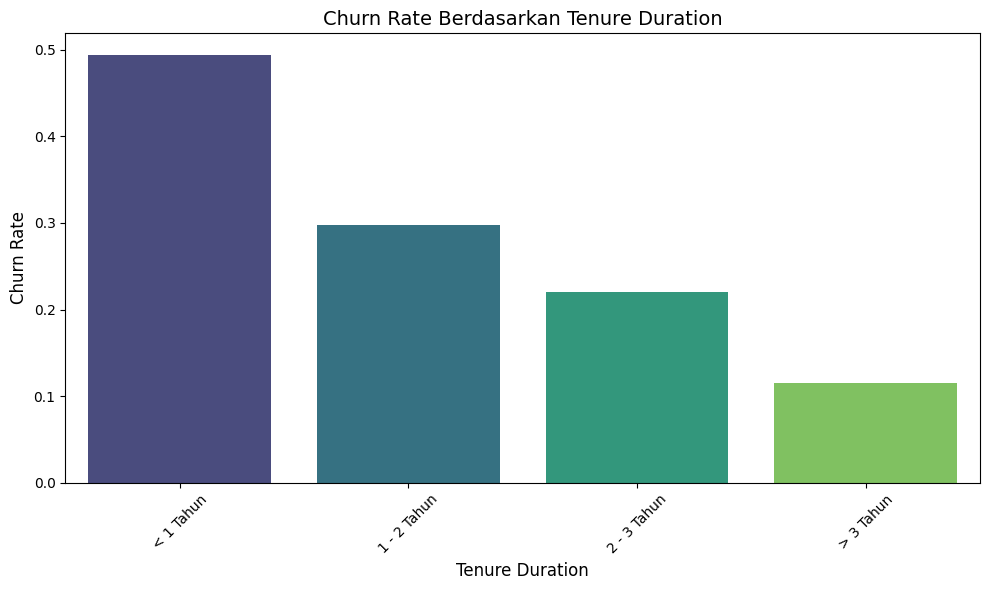

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan 'churn_by_tenure' sudah tersedia
# Misalnya hasil dari perhitungan sebelumnya
churn_by_tenure = churn_by_tenure.sort_values(by='Churn', ascending=False)

# Membuat grafik
plt.figure(figsize=(10,6))
sns.barplot(x='TenureDuration', y='Churn', data=churn_by_tenure, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Tenure Duration', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rate Berdasarkan Tenure Duration', fontsize=14)

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Rekomendasi Retensi Berdasarkan Segmentasi Tenure Duration**

#### **1. Tenure < 1 Tahun (Churn Rate: 49.45%)**

* **Onboarding yang Kuat**: Berikan panduan, tutorial, dan dukungan awal.
* **Insentif Khusus**: Diskon atau bonus untuk kontrak lebih panjang.
* **Komunikasi Proaktif**: Cek-in di bulan pertama untuk mendeteksi masalah.
* **Program Loyalitas**: Tawaran reward setelah 3 bulan berlangganan.

#### **2. Tenure 1 - 2 Tahun (Churn Rate: 29.75%)**

* **Program Retensi Loyalitas**: Diskon atau upgrade layanan untuk pelanggan setia.
* **Peningkatan Pengalaman**: Tawarkan layanan premium atau konten edukasi.
* **Kontak Proaktif**: Penawaran atau saran berdasarkan penggunaan.

#### **3. Tenure 2 - 3 Tahun (Churn Rate: 21.97%)**

* **Penghargaan Loyalitas**: Bonus atau diskon untuk perpanjangan kontrak.
* **Pengalaman yang Disesuaikan**: Penawaran berdasarkan kebutuhan spesifik.
* **Komunikasi Personal**: Kirimkan pesan penghargaan dan penawaran eksklusif.

#### **4. Tenure > 3 Tahun (Churn Rate: 11.52%)**

* **Penghargaan Premium**: Akses eksklusif dan layanan pelanggan prioritas.
* **Program Referral**: Berikan hadiah untuk referensi pelanggan baru.
* **Konsultasi Khusus**: Tawaran layanan konsultasi atau upgrade gratis.

---


# Rekomendasi Berbasis Model Logistic Regression untuk Mencegah Customer Churn

## 1. Fokus pada Fitur dengan Koefisien Signifikan dalam Model

* **Strategi Kontrak (`ordinal_cat_Contract`):**
  - Berdasarkan koefisien negatif yang besar pada model, kontrak jangka panjang sangat mengurangi risiko churn
  - Implementasikan program konversi dari kontrak bulanan ke kontrak tahunan dengan insentif progresif
  - Berikan benefit eksklusif untuk pelanggan kontrak 1-2 tahun yang tidak tersedia untuk pelanggan bulanan

* **Program Retensi Berbasis Tenure (`numeric_tenure`):**
  - Koefisien negatif pada tenure menunjukkan pelanggan baru memiliki risiko churn lebih tinggi
  - Buat program khusus untuk 6 bulan pertama dengan penawaran spesial di milestone tertentu (1 bulan, 3 bulan, 6 bulan)
  - Implementasikan sistem peringatan dini untuk pelanggan baru yang menunjukkan pola perilaku terkait churn

* **Manajemen Biaya Bulanan (`numeric_MonthlyCharges`):**
  - Koefisien positif menunjukkan biaya tinggi meningkatkan risiko churn secara signifikan
  - Evaluasi model pricing dan pertimbangkan struktur harga bertingkat berdasarkan tenure
  - Tawarkan diskon untuk pelanggan berisiko tinggi yang bersedia berkomitmen untuk kontrak lebih panjang

## 2. Optimasi Layanan Berdasarkan Korelasi Fitur dengan Churn

* **Peningkatan Layanan Fiber Optik (`onehot_cat_InternetService_Fiber_optic`):**
  - Korelasi positif dengan churn menunjukkan pelanggan fiber optik lebih berisiko
  - Lakukan audit kualitas layanan fiber optik dan identifikasi area perbaikan
  - Kembangkan paket fiber optik premium dengan garansi kepuasan pelanggan

* **Bundling Layanan Keamanan (`onehot_cat_OnlineSecurity_No`):**
  - Koefisien positif menunjukkan pelanggan tanpa keamanan online lebih cenderung churn
  - Sediakan paket keamanan online dasar secara default untuk pelanggan baru
  - Implementasikan kampanye upselling keamanan yang fokus pada nilai tambah dan perlindungan

* **Peningkatan Dukungan Teknis (`onehot_cat_TechSupport_No`):**
  - Korelasi yang signifikan antara tidak adanya dukungan teknis dan churn
  - Tingkatkan aksesibilitas dan kualitas dukungan teknis untuk semua pelanggan
  - Berikan penyelesaian masalah yang diprioritaskan untuk pelanggan berisiko tinggi

## 3. Strategi Intervensi Berdasarkan Output Probabilitas Model Logistic Regression

* **Pendekatan Berbasis Threshold untuk Mengatasi False Positives (FP=231):**
  - Segmentasi pelanggan berdasarkan probabilitas churn dari model Logistic Regression:
    * Risiko Tinggi (>0.8): Intervensi intensif dengan penawaran yang substantif
    * Risiko Menengah (0.6-0.8): Intervensi moderat dengan penawaran bernilai menengah
    * Risiko Rendah (0.4-0.6): Monitoring dan intervensi ringan (survei, edukasi)
  - Validasi risiko churn melalui survei singkat sebelum intervensi mahal untuk mengurangi FP

* **Memaksimalkan F2 Score dan Recall (0.853):**
  - Prioritaskan mendeteksi semua kasus churn potensial (recall tinggi) sambil menyeimbangkan precision
  - Gunakan output probabilitas Logistic Regression untuk penentuan prioritas intervensi
  - Implementasikan program kontak proaktif untuk semua pelanggan dengan probabilitas churn >0.6

* **Evaluasi ROI Intervensi:**
  - Hitung biaya intervensi vs nilai pelanggan untuk menentukan titik optimal
  - Kembangkan sistem scoring dinamis berdasarkan probabilitas churn × nilai pelanggan
  - Implementasikan A/B testing untuk mengukur efektivitas berbagai strategi intervensi

# Save Model

In [114]:
# disimpan include dengan report tuning
save_model(random_search.best_estimator_, "logreg_forward.pkl")

# disimpan hanya model terbaik tanpa report
save_model(logreg_tuning, "logreg_forward.pkl")

Model is pickled as model/logreg_forward.pkl
Model is pickled as model/logreg_forward.pkl


In [115]:
# disimpan include dengan report tuning
save_model(gscv.best_estimator_, "logreg_korelasi.pkl")

# disimpan hanya model terbaik tanpa report
save_model(logreg_tuning, "logreg_korelasi.pkl")

Model is pickled as model/logreg_korelasi.pkl
Model is pickled as model/logreg_korelasi.pkl
